In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# eda

In [2]:
df=pd.read_csv(r"C:\Users\jeeva\Downloads\train.csv")

In [3]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [4]:
df["area_code"]=df["area_code"].apply(lambda x:x[-3:])

In [5]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df[df["number_customer_service_calls"]>=5]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
17,CO,77,408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,yes
127,OK,96,415,no,no,0,260.4,115,44.27,146.0,46,12.41,269.5,87,12.13,11.5,4,3.11,5,no
148,AK,126,415,no,no,0,58.2,94,9.89,138.7,118,11.79,136.8,91,6.16,11.9,1,3.21,5,yes
194,MN,139,510,no,no,0,134.4,106,22.85,211.3,98,17.96,193.6,125,8.71,10.2,2,2.75,5,yes
277,AL,86,415,no,no,0,128.3,121,21.81,197.1,93,16.75,138.4,152,6.23,12.2,5,3.29,7,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056,MI,62,408,no,no,0,119.3,94,20.28,224.0,81,19.04,156.7,78,7.05,12.1,6,3.27,5,yes
4061,NY,102,408,no,yes,48,134.0,83,22.78,234.3,128,19.92,197.3,107,8.88,7.8,4,2.11,6,yes
4072,UT,141,510,no,no,0,196.5,104,33.41,175.1,111,14.88,209.6,110,9.43,14.1,4,3.81,6,no
4180,NJ,77,415,yes,no,0,323.7,106,55.03,139.2,99,11.83,204.4,89,9.20,8.5,3,2.30,6,yes


In [7]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [9]:
df["area_code"]=df["area_code"].astype("int")


In [10]:
df[df.isnull().any(axis=1)]


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [11]:
df[df.duplicated]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


# univariet analysis

# state

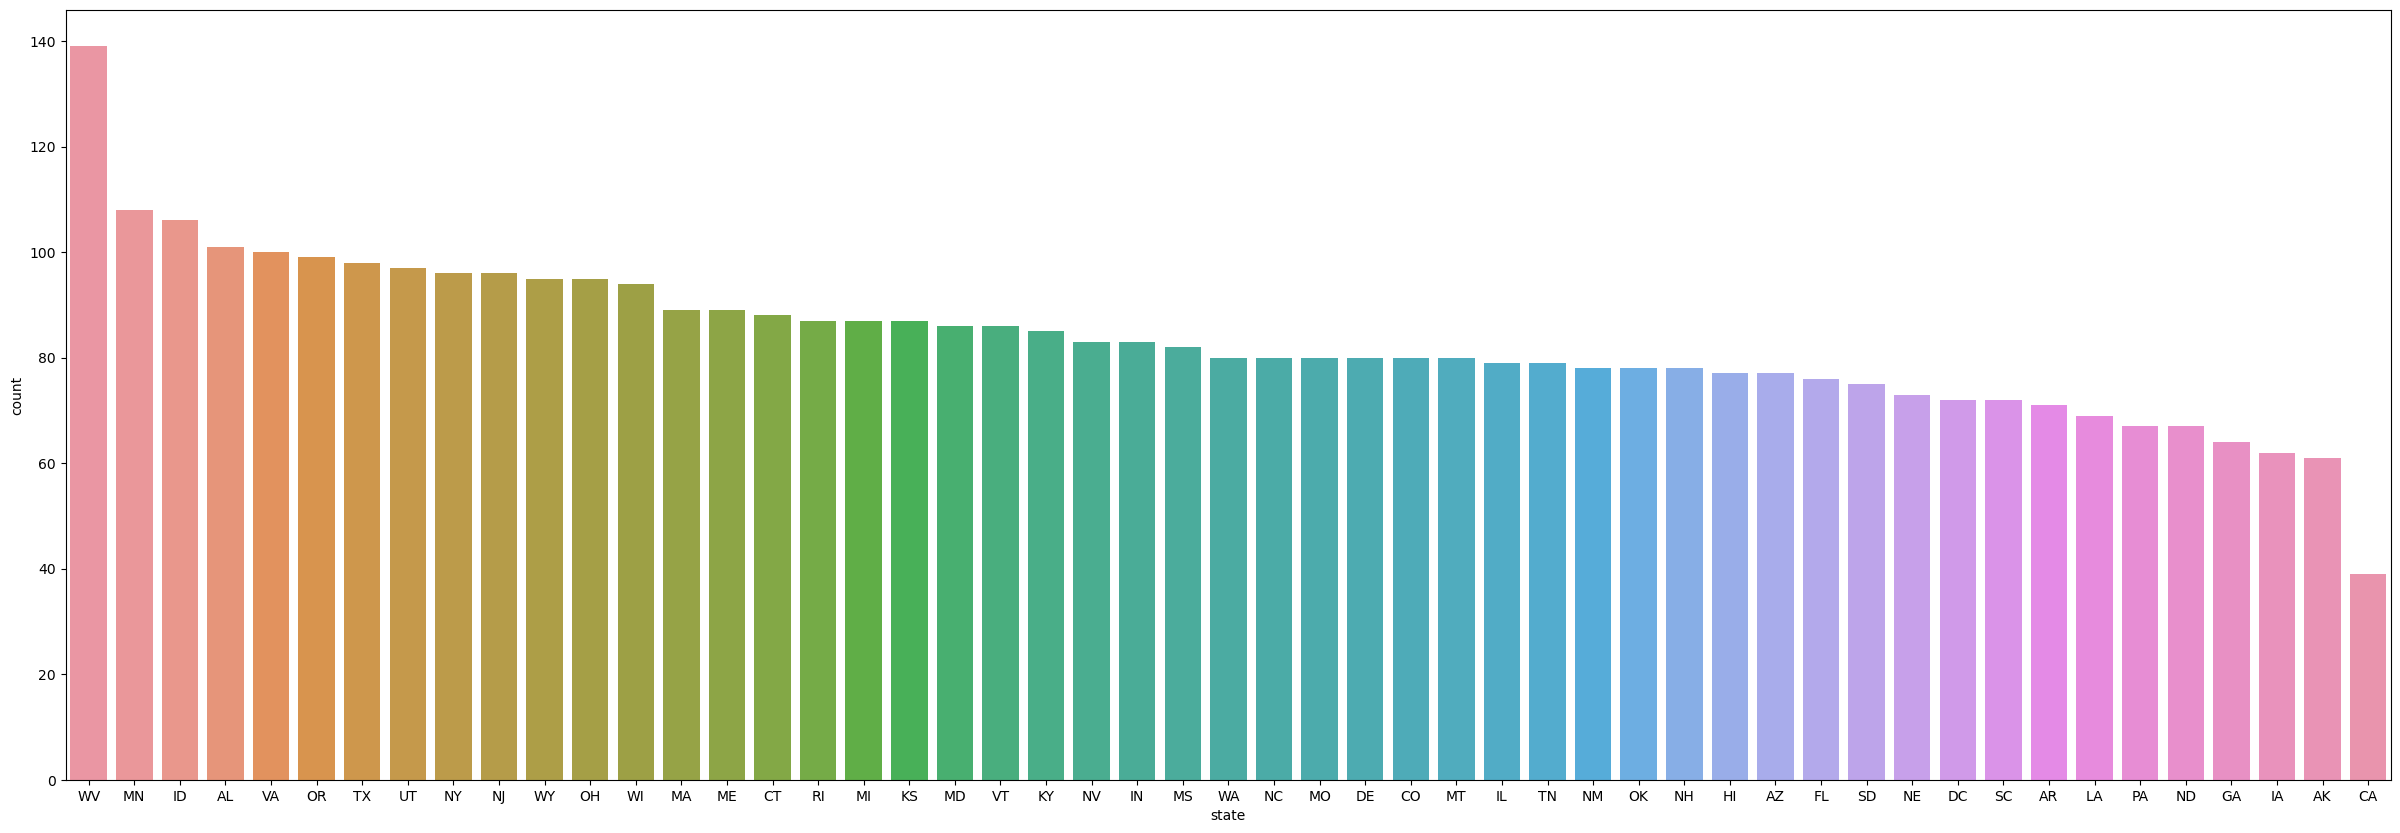

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(x=df["state"].value_counts().index, y=df["state"].value_counts().values)
plt.ylabel("count")
plt.show()

In [13]:
df["state"].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [14]:
df["state"].nunique()

51

# international_plan

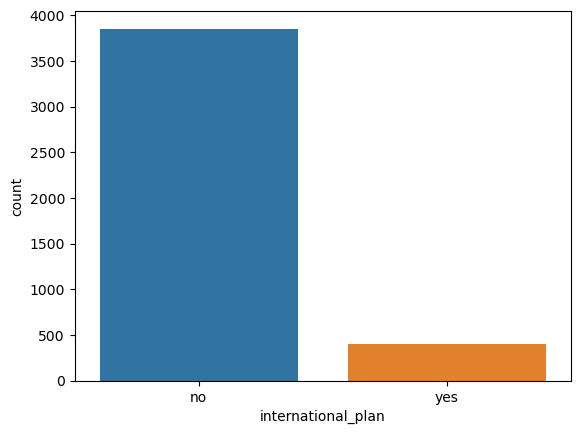

In [15]:

sns.barplot(x=df["international_plan"].value_counts().index, y=df["international_plan"].value_counts().values)
plt.ylabel("count")
plt.show()

In [16]:
df["international_plan"].unique()

array(['no', 'yes'], dtype=object)

In [17]:
df["international_plan"].nunique()

2

# voice_mail_plan

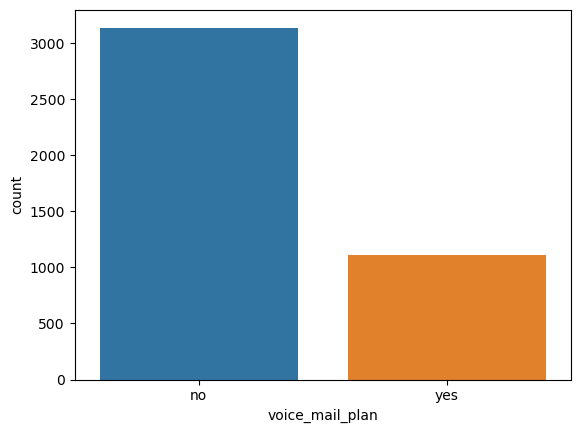

In [18]:

sns.barplot(x=df["voice_mail_plan"].value_counts().index, y=df["voice_mail_plan"].value_counts().values)
plt.ylabel("count")
plt.show()

In [19]:
df["voice_mail_plan"].unique()

array(['yes', 'no'], dtype=object)

In [20]:
df["voice_mail_plan"].nunique()

2

In [21]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# account_lenght

In [22]:
df["account_length"].describe()

count    4250.000000
mean      100.236235
std        39.698401
min         1.000000
25%        73.000000
50%       100.000000
75%       127.000000
max       243.000000
Name: account_length, dtype: float64

In [23]:
df["account_length"].value_counts()

account_length
90     53
87     51
93     50
105    48
100    48
       ..
191     1
243     1
199     1
215     1
202     1
Name: count, Length: 215, dtype: int64

In [24]:
df["account_length"].unique()

array([107, 137,  84,  75, 121, 147, 117, 141,  65,  74, 168,  95, 161,
        85,  76,  73,  77, 130, 111, 132,  57,  54,  20,  49,  12,  36,
        78, 136,  98, 135,  34, 160,  64,  59, 142,  97,  52,  60,  10,
        96,  81, 125, 174, 116, 149,  38,  40,  43, 113, 126, 150, 138,
       162,  90,  50,  82, 144,  46,  70, 128,  94, 155,  80,  99, 120,
       108, 122,  93, 157,  63,  41, 193,  61,  92, 163,  91, 127, 110,
       103, 145,  56, 151,  83, 139,   6, 115,  62, 185, 148,  32,  68,
        25, 179,  67,  19, 170, 106,  51, 118, 208, 131,  53, 105,  66,
        35,  88, 123,  45, 100, 215,  22,  33,  86, 114,  24, 119, 101,
       146, 143,  48, 167,  89, 199, 166, 158, 196, 112, 209,  16,  39,
       104, 129,  55,  44,  79, 159, 194,  87,  21, 133, 224, 140,  58,
       109,  71,  72, 124, 102, 165,  18,  30, 190,  47, 152,  26,  69,
        31, 186, 171,  28, 153, 172, 169,  13, 189, 176, 156,  37,  27,
       134, 243,  42,  23,   1, 200,   5, 178, 181, 182, 217, 16

In [25]:
df["account_length"].min()


1

In [26]:
df["account_length"].max()

243

C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\1701633722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["account_length"])


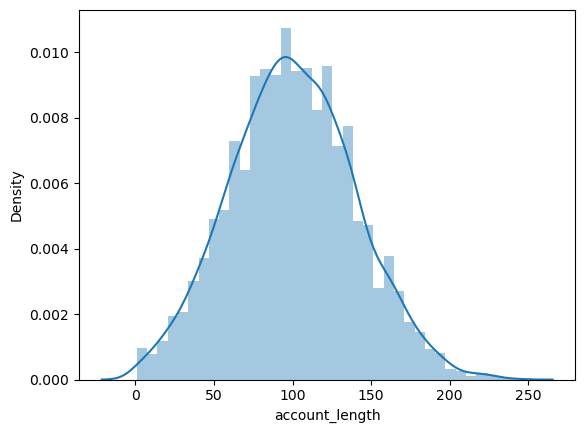

In [27]:
sns.distplot(df["account_length"])
plt.show()

In [28]:
df["account_length"].skew()

0.12232732438422539

# area_code

Description of 'area_code' column:
count    4250.000000
mean      436.816000
std        42.183514
min       408.000000
25%       408.000000
50%       415.000000
75%       415.000000
max       510.000000
Name: area_code, dtype: float64
 
*************************************************************
 

Unique values of 'area_code' column:
[415 408 510]
 
*************************************************************
 
Minimum value of 'area_code' column: 408
Maximum value of 'area_code' column: 510
 
*************************************************************
 

Distribution of 'area_code' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\3030494516.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["area_code"])


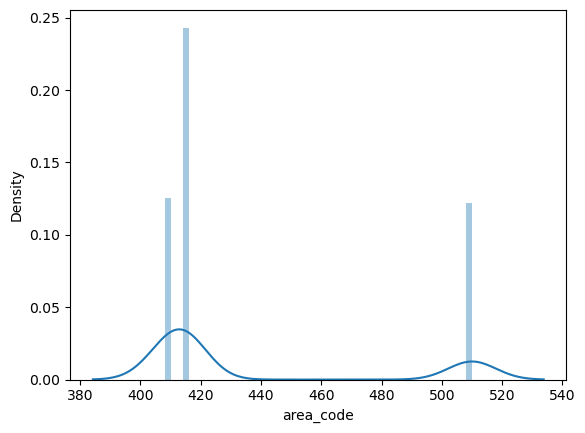

 
*************************************************************
 

Skewness of 'area_code' column: 1.148211019414388


In [29]:
print("Description of 'area_code' column:")
print(df["area_code"].describe())

print(" ")
print("*************************************************************")
print(" ")



print("\nUnique values of 'area_code' column:")
print(df["area_code"].unique())

print(" ")
print("*************************************************************")
print(" ")

print("Minimum value of 'area_code' column:", df["area_code"].min())
print("Maximum value of 'area_code' column:", df["area_code"].max())

print(" ")
print("*************************************************************")
print(" ")


print("\nDistribution of 'area_code' column:")
sns.distplot(df["area_code"])
plt.show()

print(" ")
print("*************************************************************")
print(" ")


print("\nSkewness of 'area_code' column:", df["area_code"].skew())

<Axes: xlabel='area_code'>

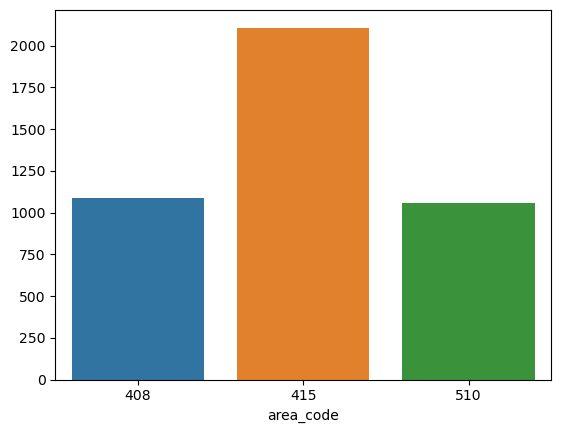

In [30]:

sns.barplot(x=df["area_code"].value_counts().index,y=df["area_code"].value_counts().values)


# number_vmail_messages

In [31]:
print("Description of 'number_vmail_messages' column:")
print(df["number_vmail_messages"].describe())



print(" ")
print("*************************************************************")
print(" ")


print("\nUnique values of 'number_vmail_messages' column:")
print(df["number_vmail_messages"].unique())

print(" ")
print("*************************************************************")
print(" ")


print("Minimum value of 'number_vmail_messages' column:", df["number_vmail_messages"].min())
print("Maximum value of 'number_vmail_messages' column:", df["number_vmail_messages"].max())

print(" ")
print("*************************************************************")
print(" ")




Description of 'number_vmail_messages' column:
count    4250.000000
mean        7.631765
std        13.439882
min         0.000000
25%         0.000000
50%         0.000000
75%        16.000000
max        52.000000
Name: number_vmail_messages, dtype: float64
 
*************************************************************
 

Unique values of 'number_vmail_messages' column:
[26  0 24 37 27 33 39 25 30 41 28 34 46 29 35 21 42 22 36 23 43 31 38 40
 32 48 18 17 45 16 20 14 19 15 11 12 47  8 44 49  4 10 13 50  6 52]
 
*************************************************************
 
Minimum value of 'number_vmail_messages' column: 0
Maximum value of 'number_vmail_messages' column: 52
 
*************************************************************
 


In [32]:
df["number_vmail_messages"].nunique()

46


Distribution of 'number_vmail_messages' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\2883365948.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["number_vmail_messages"])


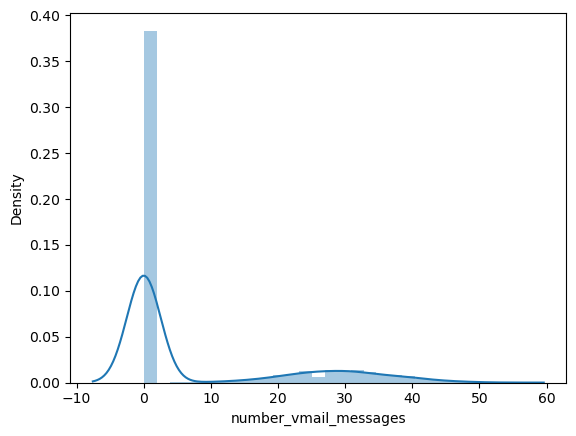

 
*************************************************************
 

Skewness of 'number_vmail_messages' column: 1.373091038123339


In [33]:
# Plot distribution of "number_vmail_messages" column
print("\nDistribution of 'number_vmail_messages' column:")
sns.distplot(df["number_vmail_messages"])
plt.show()

print(" ")
print("*************************************************************")
print(" ")



# Skewness of "number_vmail_messages" column
print("\nSkewness of 'number_vmail_messages' column:", df["number_vmail_messages"].skew())

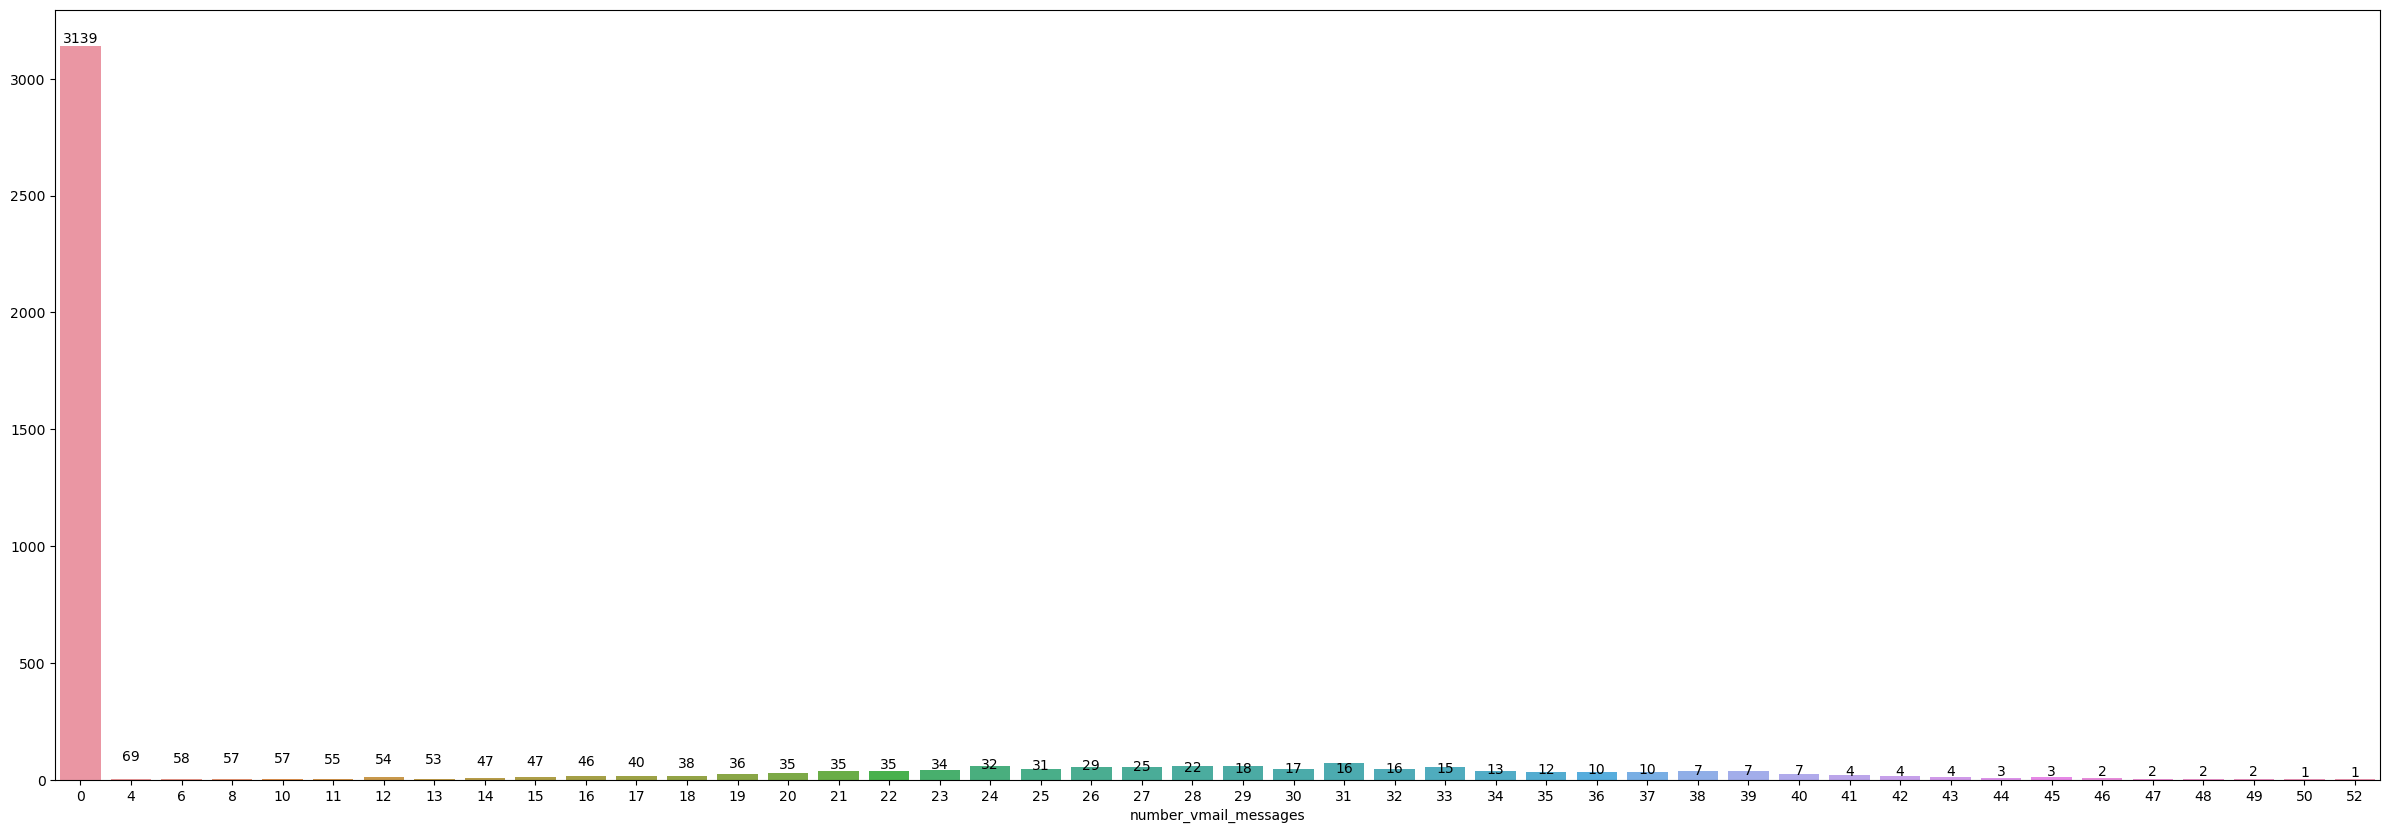

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
sns.barplot(x=df["number_vmail_messages"].value_counts().index, y=df["number_vmail_messages"].value_counts().values)

# Loop through each bar to add text annotations
for index, value in enumerate(df["number_vmail_messages"].value_counts().values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()


In [35]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


# total_day_minutes

In [36]:

# Describe the "total_day_minutes" column
print("Description of 'total_day_minutes' column:")
print(df["total_day_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_day_minutes' column
print("Unique values of 'total_day_minutes' column:")
print(df["total_day_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_day_minutes' column
print("Minimum value of 'total_day_minutes' column:", df["total_day_minutes"].min())
print("Maximum value of 'total_day_minutes' column:", df["total_day_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_day_minutes' column
print("Number of unique values in 'total_day_minutes' column:", df["total_day_minutes"].nunique())



Description of 'total_day_minutes' column:
count    4250.000000
mean      180.259600
std        54.012373
min         0.000000
25%       143.325000
50%       180.450000
75%       216.200000
max       351.500000
Name: total_day_minutes, dtype: float64

*************************************************************

Unique values of 'total_day_minutes' column:
[161.6 243.4 299.4 ... 188.7   7.2 170. ]

*************************************************************

Minimum value of 'total_day_minutes' column: 0.0
Maximum value of 'total_day_minutes' column: 351.5

*************************************************************

Number of unique values in 'total_day_minutes' column: 1843



Distribution of 'total_day_minutes' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\4230919357.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_day_minutes"])


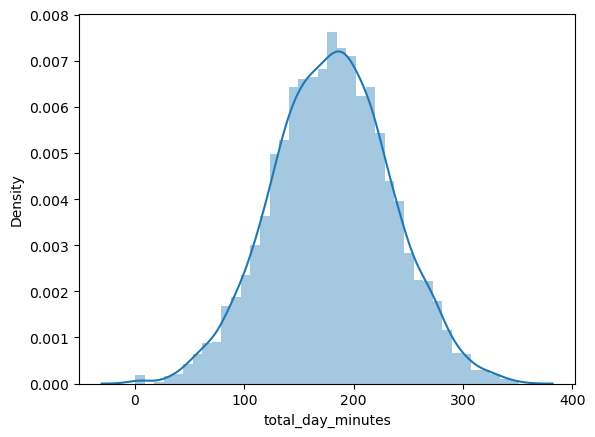


*************************************************************

Skewness of 'total_day_minutes' column: -0.006910229800877682


In [37]:
# Plot distribution of "total_day_minutes" column
print("\nDistribution of 'total_day_minutes' column:")
sns.distplot(df["total_day_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_day_minutes" column
print("Skewness of 'total_day_minutes' column:", df["total_day_minutes"].skew())


# total_day_calls

Description of 'total_day_calls' column:
count    4250.000000
mean       99.907294
std        19.850817
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: total_day_calls, dtype: float64

*************************************************************

Unique values of 'total_day_calls' column:
[123 114  71 113  88  79  97  84 137 127  96  67 139  66  90 117  89 112
 103  86 115  73 109 105 118  94 128  64 106 102  85  82  77 120 133 135
 108  57  98 129  83  92  74  93  70 101 146  72  99 104 125  61 100 110
  87 131  65 124 119  52  68 107  47 121 116 126  91 122 111 145  76  95
  80  78 140 148  81  55  69 136 158 134 130  63  53 141  75  59 132 138
  54 151  62 144 147  36  40 150  56  58  51 165  30  48  60  42   0  45
 160 143 152 142 156  35  49 157  44  50  34  46]

*************************************************************

Minimum value of 'total_day_calls' column: 0
Maximum value of 'total_day_calls' column: 165

*

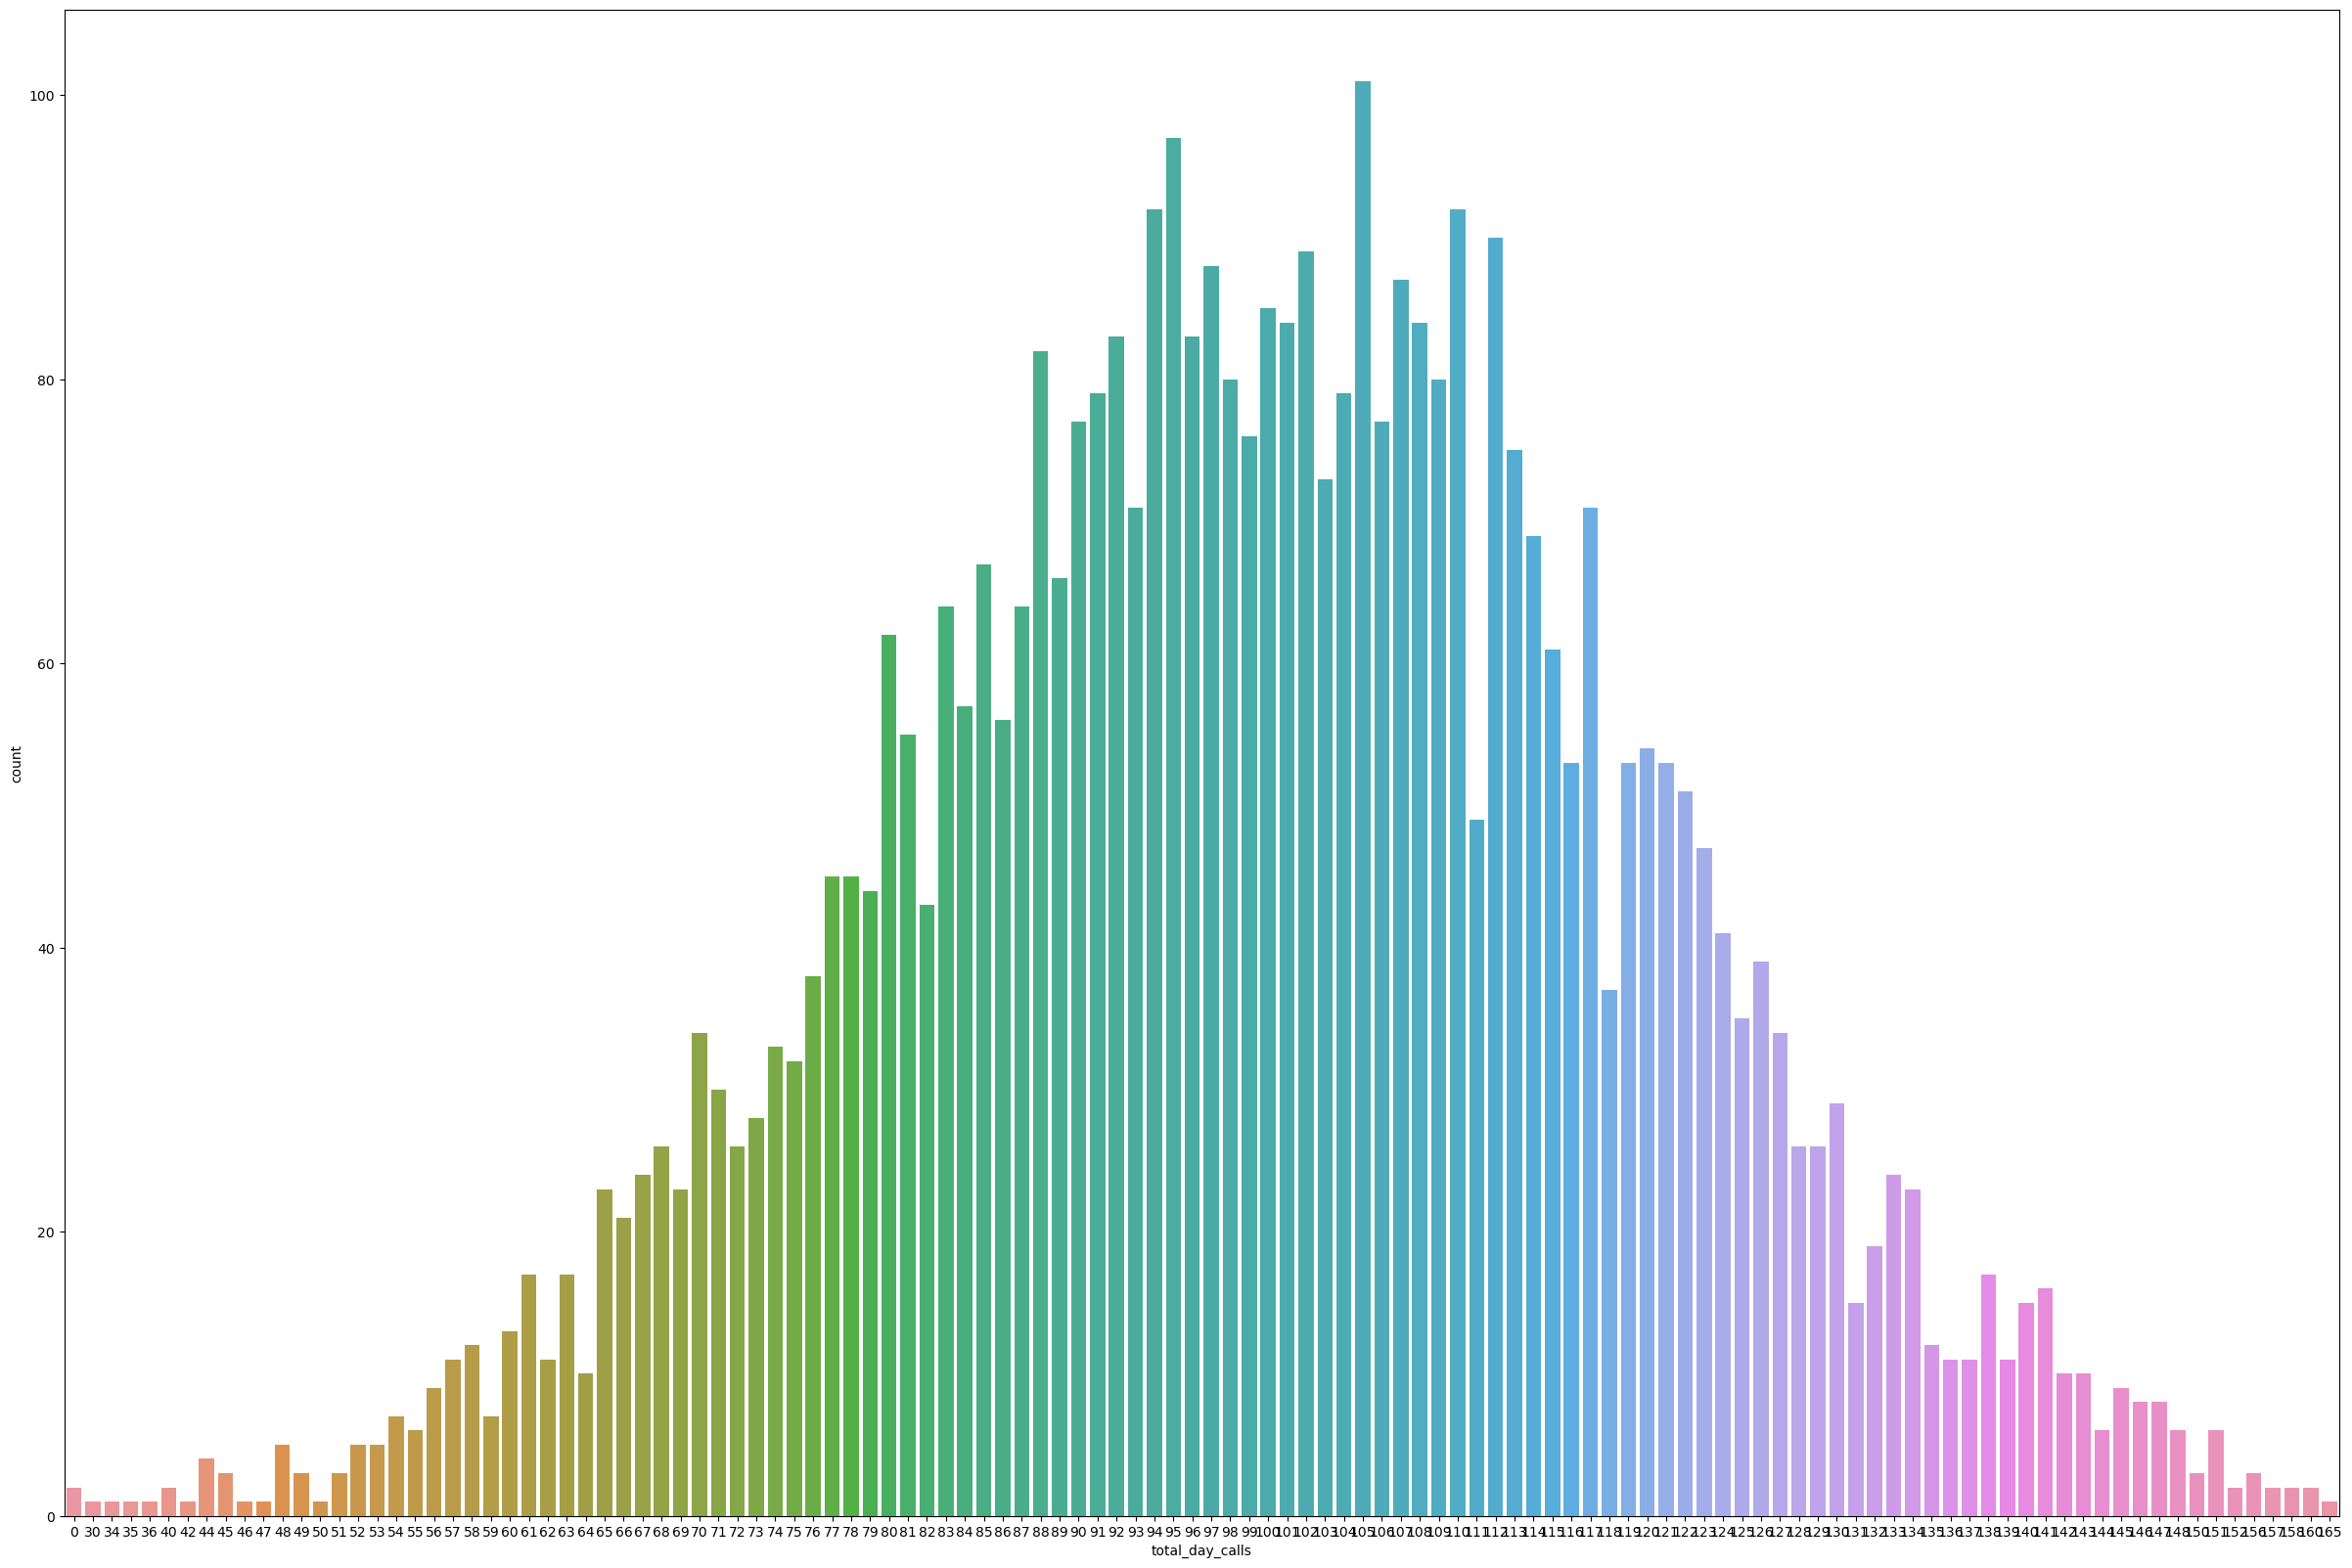


*************************************************************



In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describe the "total_day_calls" column
print("Description of 'total_day_calls' column:")
print(df["total_day_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_day_calls' column
print("Unique values of 'total_day_calls' column:")
print(df["total_day_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_day_calls' column
print("Minimum value of 'total_day_calls' column:", df["total_day_calls"].min())
print("Maximum value of 'total_day_calls' column:", df["total_day_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_day_calls' column
print("Number of unique values in 'total_day_calls' column:", df["total_day_calls"].nunique())

# Plot count of occurrences of "total_day_calls" column
print("\nCount of occurrences of 'total_day_calls' column:")
plt.figure(figsize=(30,20))
sns.countplot(x=df["total_day_calls"])
plt.show()

print("\n*************************************************************\n")


# total_day_charge

In [39]:


# Describe the "total_day_charge" column
print("Description of 'total_day_charge' column:")
print(df["total_day_charge"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_day_charge' column
print("Unique values of 'total_day_charge' column:")
print(df["total_day_charge"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_day_charge' column
print("Minimum value of 'total_day_charge' column:", df["total_day_charge"].min())
print("Maximum value of 'total_day_charge' column:", df["total_day_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_day_charge' column
print("Number of unique values in 'total_day_charge' column:", df["total_day_charge"].nunique())



Description of 'total_day_charge' column:
count    4250.000000
mean       30.644682
std         9.182096
min         0.000000
25%        24.365000
50%        30.680000
75%        36.750000
max        59.760000
Name: total_day_charge, dtype: float64

*************************************************************

Unique values of 'total_day_charge' column:
[27.47 41.38 50.9  ... 32.08  1.22 28.9 ]

*************************************************************

Minimum value of 'total_day_charge' column: 0.0
Maximum value of 'total_day_charge' column: 59.76

*************************************************************

Number of unique values in 'total_day_charge' column: 1843



Distribution of 'total_day_charge' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\1372504115.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_day_charge"])


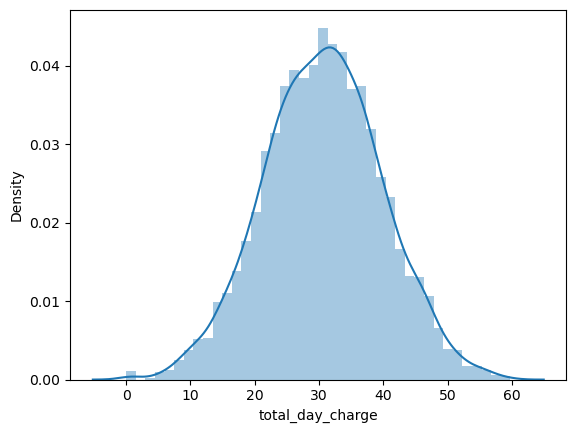


*************************************************************

Skewness of 'total_day_charge' column: -0.0069125262282953735


In [40]:
# Plot distribution of "total_day_charge" column
print("\nDistribution of 'total_day_charge' column:")
sns.distplot(df["total_day_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_day_charge" column
print("Skewness of 'total_day_charge' column:", df["total_day_charge"].skew())


# total_eve_minutes.

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describe the "total_eve_minutes" column
print("Description of 'total_eve_minutes' column:")
print(df["total_eve_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_eve_minutes' column
print("Unique values of 'total_eve_minutes' column:")
print(df["total_eve_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_eve_minutes' column
print("Minimum value of 'total_eve_minutes' column:", df["total_eve_minutes"].min())
print("Maximum value of 'total_eve_minutes' column:", df["total_eve_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_eve_minutes' column
print("Number of unique values in 'total_eve_minutes' column:", df["total_eve_minutes"].nunique())



Description of 'total_eve_minutes' column:
count    4250.000000
mean      200.173906
std        50.249518
min         0.000000
25%       165.925000
50%       200.700000
75%       233.775000
max       359.300000
Name: total_eve_minutes, dtype: float64

*************************************************************

Unique values of 'total_eve_minutes' column:
[195.5 121.2  61.9 ... 276.6 280.6 340.3]

*************************************************************

Minimum value of 'total_eve_minutes' column: 0.0
Maximum value of 'total_eve_minutes' column: 359.3

*************************************************************

Number of unique values in 'total_eve_minutes' column: 1773


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\4201429537.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_eve_minutes"])



Distribution of 'total_eve_minutes' column:


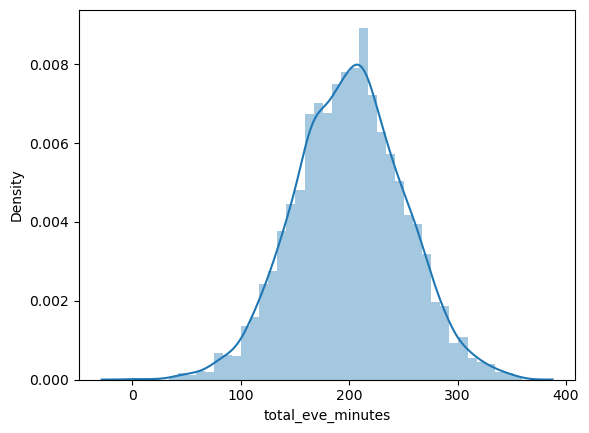


*************************************************************

Skewness of 'total_eve_minutes' column: -0.030414586244988526


In [42]:
# Plot distribution of "total_eve_minutes" column
print("\nDistribution of 'total_eve_minutes' column:")
sns.distplot(df["total_eve_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_eve_minutes" column
print("Skewness of 'total_eve_minutes' column:", df["total_eve_minutes"].skew())



# total_eve_calls

Description of 'total_eve_calls' column:
count    4250.000000
mean      100.176471
std        19.908591
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: total_eve_calls, dtype: float64

*************************************************************

Unique values of 'total_eve_calls' column:
[103 110  88 122 108  94  80 111  83 148  71  75  97  90  65  93 121  99
 102  72 112 100  84 109 107 119 116  85  98 118  92  74  58  96 115  66
  67  62  77 126 142  64 104 117  79  86 101  76 105  81 106 113  59  48
  95  87 123 114 140 128  60 125  91  46 138 129 133 136  57 135 139  51
  70  89  82  78  63 134  73 152 168 120  69 127 132 137 143  68 124  54
 131  52  61  56 130 146  55  12 157 155 147  45  50 144  36 156  53 141
  44 153 154 149 151 150  43   0 145 159 170  47 169  38  49]

*************************************************************

Minimum value of 'total_eve_calls' column: 0
Maximum value of 'total_eve_calls' co

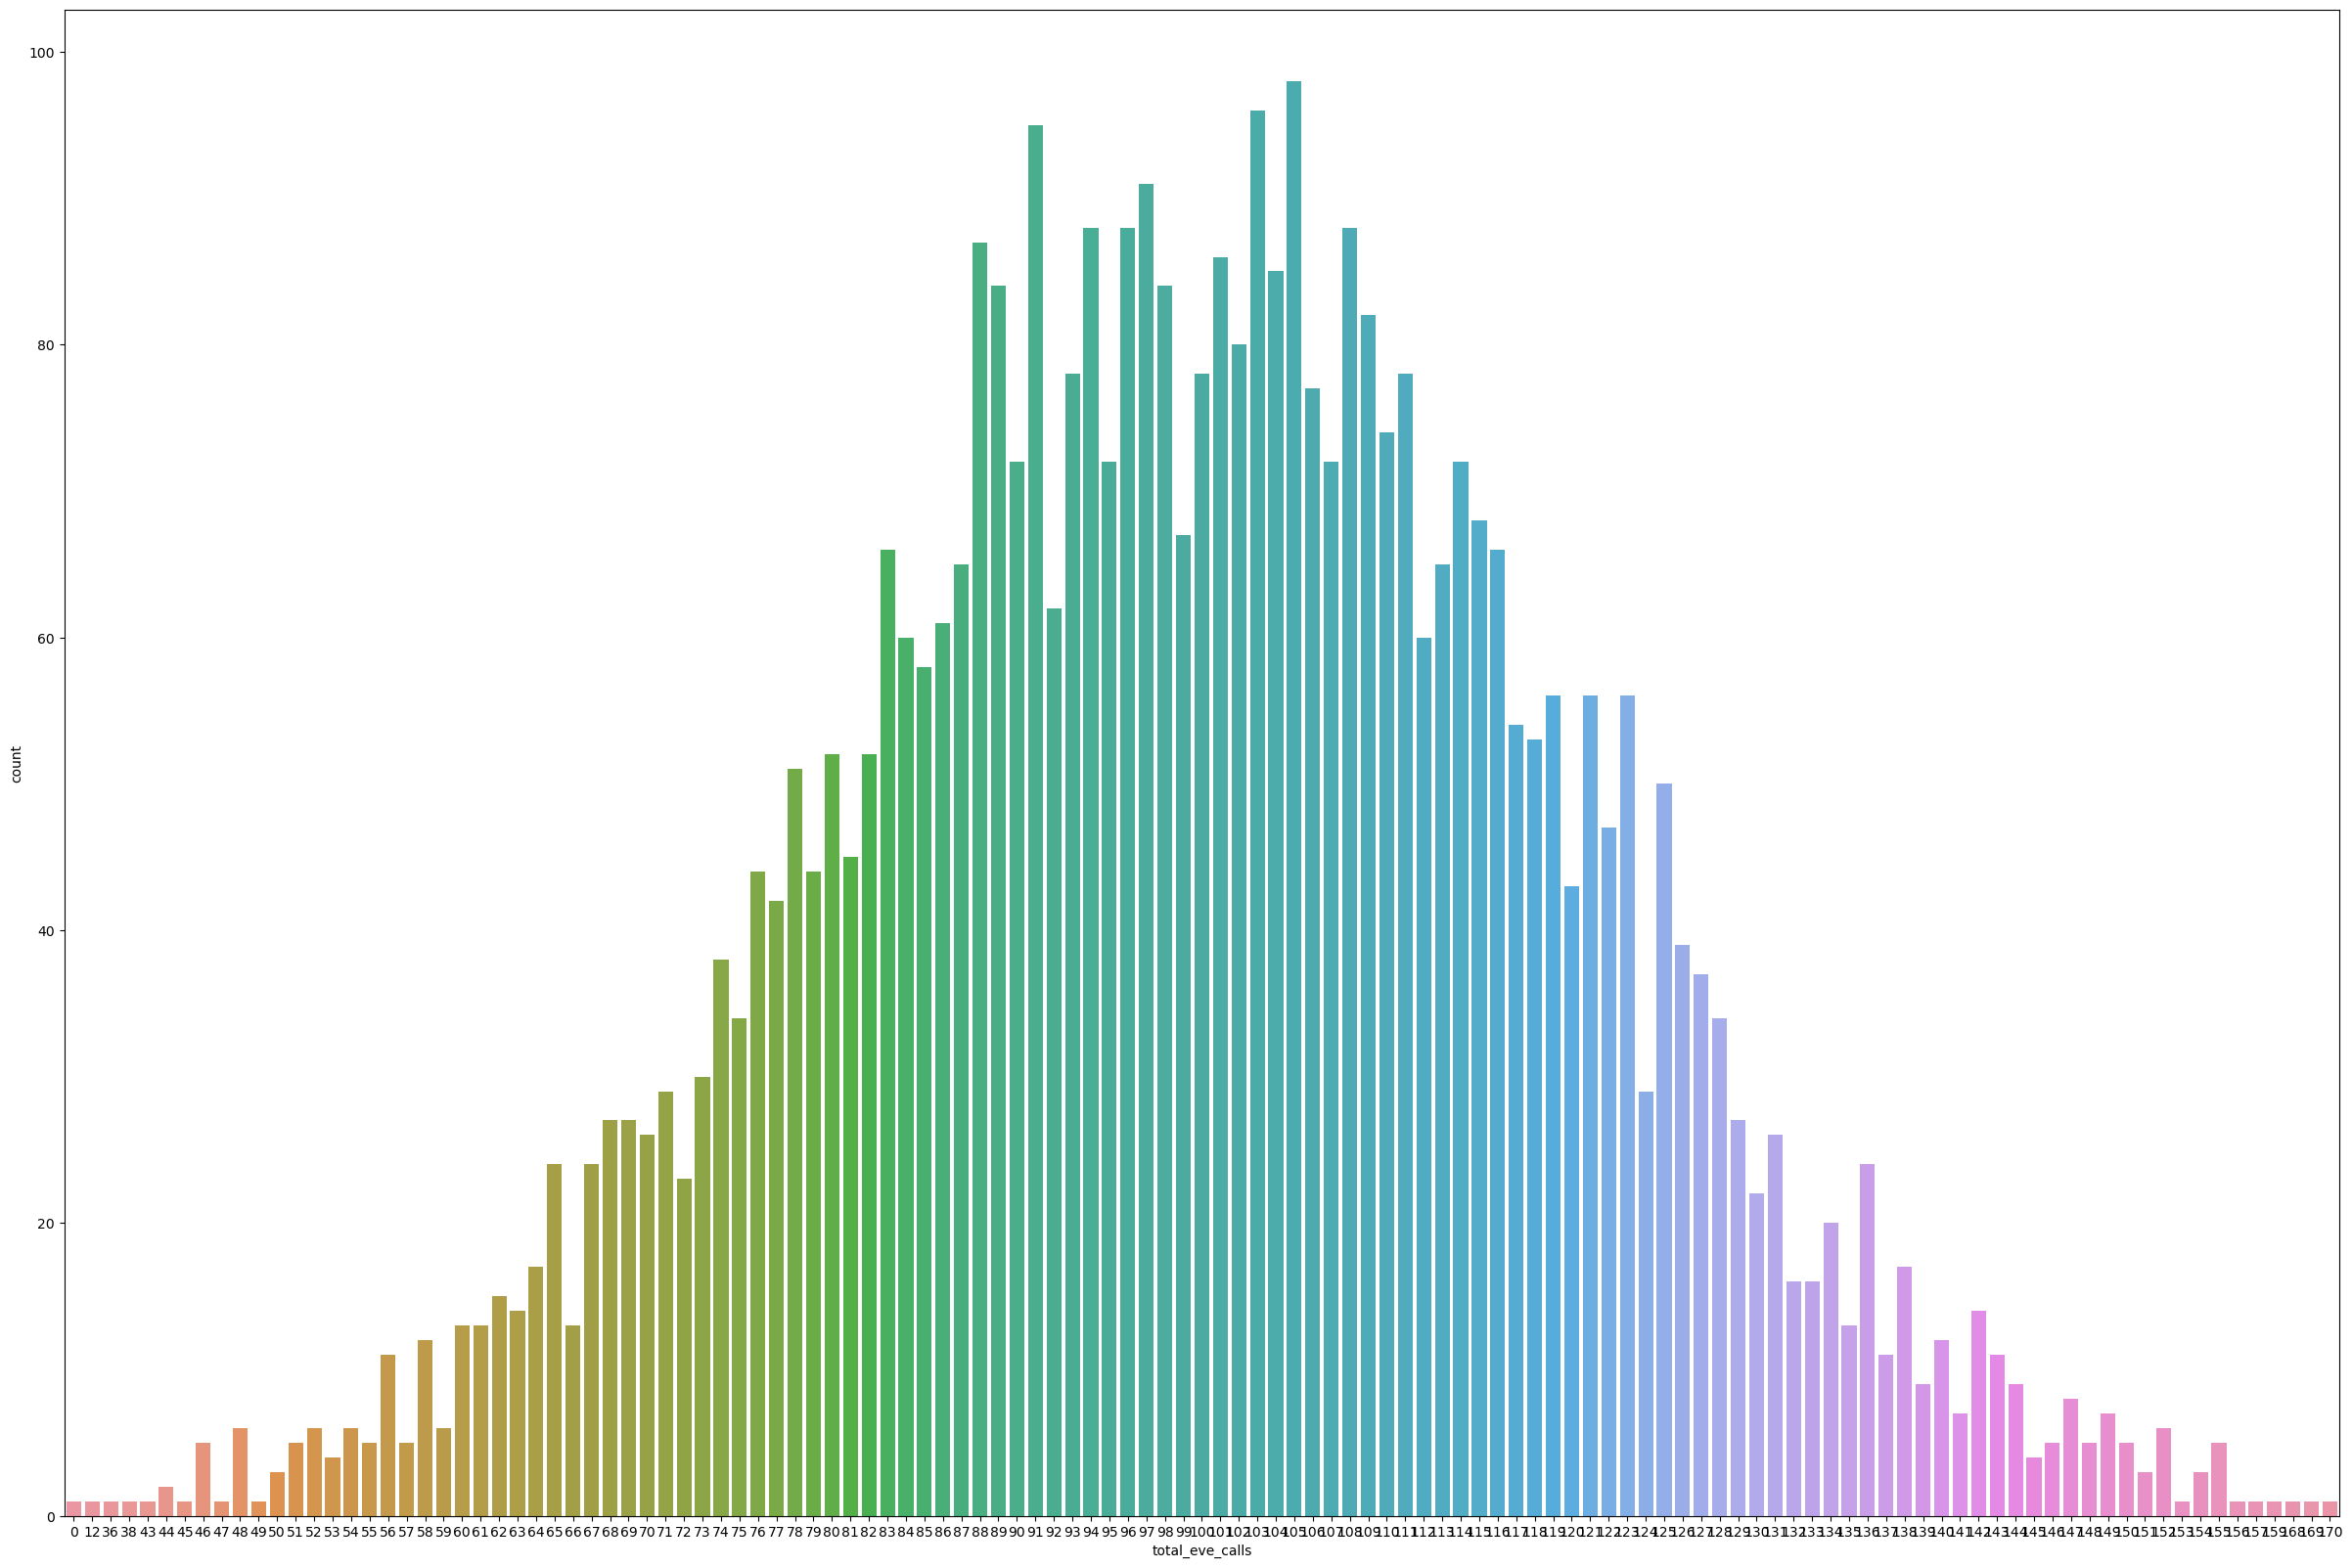


*************************************************************



In [43]:


# Describe the "total_eve_calls" column
print("Description of 'total_eve_calls' column:")
print(df["total_eve_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_eve_calls' column
print("Unique values of 'total_eve_calls' column:")
print(df["total_eve_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_eve_calls' column
print("Minimum value of 'total_eve_calls' column:", df["total_eve_calls"].min())
print("Maximum value of 'total_eve_calls' column:", df["total_eve_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_eve_calls' column
print("Number of unique values in 'total_eve_calls' column:", df["total_eve_calls"].nunique())

# Plot count of occurrences of "total_eve_calls" column
print("\nCount of occurrences of 'total_eve_calls' column:")
plt.figure(figsize=(30,20))
sns.countplot(x=df["total_eve_calls"])
plt.show()

print("\n*************************************************************\n")



# total_eve_charge.

In [44]:
# Describe the "total_eve_charge" column
print("\nDescription of 'total_eve_charge' column:")
print(df["total_eve_charge"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_eve_charge' column
print("Unique values of 'total_eve_charge' column:")
print(df["total_eve_charge"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_eve_charge' column
print("Minimum value of 'total_eve_charge' column:", df["total_eve_charge"].min())
print("Maximum value of 'total_eve_charge' column:", df["total_eve_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_eve_charge' column
print("Number of unique values in 'total_eve_charge' column:", df["total_eve_charge"].nunique())




Description of 'total_eve_charge' column:
count    4250.000000
mean       17.015012
std         4.271212
min         0.000000
25%        14.102500
50%        17.060000
75%        19.867500
max        30.540000
Name: total_eve_charge, dtype: float64

*************************************************************

Unique values of 'total_eve_charge' column:
[16.62 10.3   5.26 ... 23.51 23.85 28.93]

*************************************************************

Minimum value of 'total_eve_charge' column: 0.0
Maximum value of 'total_eve_charge' column: 30.54

*************************************************************

Number of unique values in 'total_eve_charge' column: 1572



Distribution of 'total_eve_charge' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\2412816542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_eve_charge"])


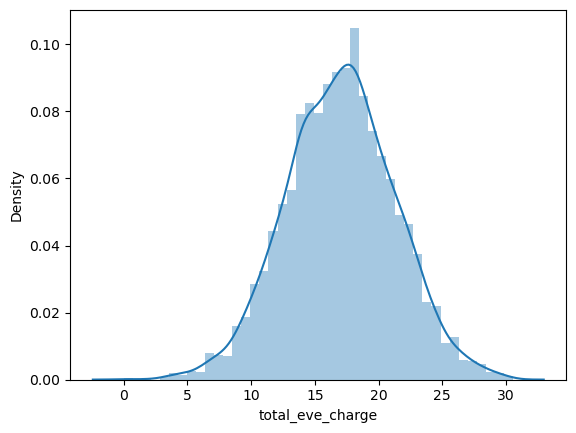


*************************************************************

Skewness of 'total_eve_charge' column: -0.03038789084081965


In [45]:
# Plot distribution of "total_eve_charge" column
print("\nDistribution of 'total_eve_charge' column:")
sns.distplot(df["total_eve_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_eve_charge" column
print("Skewness of 'total_eve_charge' column:", df["total_eve_charge"].skew())


# total_night_minutes.

Description of 'total_night_minutes' column:
count    4250.000000
mean      200.527882
std        50.353548
min         0.000000
25%       167.225000
50%       200.450000
75%       234.700000
max       395.000000
Name: total_night_minutes, dtype: float64

*************************************************************

Unique values of 'total_night_minutes' column:
[254.4 162.6 196.9 ... 162.   75.1 297.5]

*************************************************************

Minimum value of 'total_night_minutes' column: 0.0
Maximum value of 'total_night_minutes' column: 395.0

*************************************************************

Number of unique values in 'total_night_minutes' column: 1757

Distribution of 'total_night_minutes' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\1338429834.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_night_minutes"])


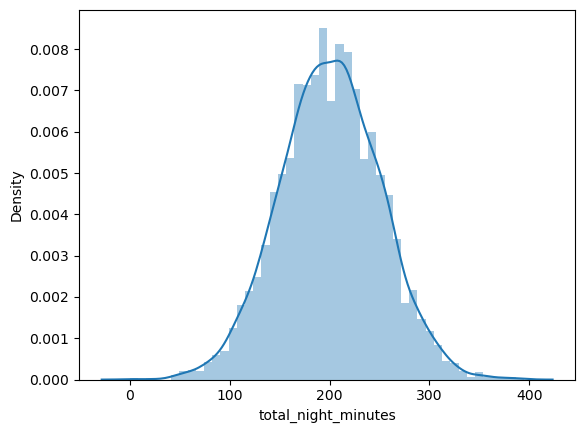


*************************************************************

Skewness of 'total_night_minutes' column: 0.008490819348496867


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Describe the "total_night_minutes" column
print("Description of 'total_night_minutes' column:")
print(df["total_night_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_night_minutes' column
print("Unique values of 'total_night_minutes' column:")
print(df["total_night_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_night_minutes' column
print("Minimum value of 'total_night_minutes' column:", df["total_night_minutes"].min())
print("Maximum value of 'total_night_minutes' column:", df["total_night_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_night_minutes' column
print("Number of unique values in 'total_night_minutes' column:", df["total_night_minutes"].nunique())

# Plot distribution of "total_night_minutes" column
print("\nDistribution of 'total_night_minutes' column:")
sns.distplot(df["total_night_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_night_minutes" column
print("Skewness of 'total_night_minutes' column:", df["total_night_minutes"].skew())



# total_night_call

Description of 'total_night_calls' column:
count    4250.000000
mean       99.839529
std        20.093220
min         0.000000
25%        86.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: total_night_calls, dtype: float64

*************************************************************

Unique values of 'total_night_calls' column:
[103 104  89 121 118  96  90  97 111  94 128 115  75 108  74 133  64  78
 105  68 102  98 116 109 107 135  92  86 127  79  87 129  57  77  95  54
 106  53  67 139  60 100  61  99  73 113  76 119  84  62  91  72 114  88
 126 122 123 117  82  80 120 130  71  59 112 132 142 101 150  69 131 110
  83  93 124 136 125  81  66 143  58  55  85  70  46  42 152  44  50 153
  49 175  63 138 134 154 140 141 146  65  51 151 137 158 155 157 147 145
 148 144 149  56  52  33 156  38  36  48 164  40 161 159 160 170  41 165
  43   0]

*************************************************************

Minimum value of 'total_night_calls' column: 0
Maximum 

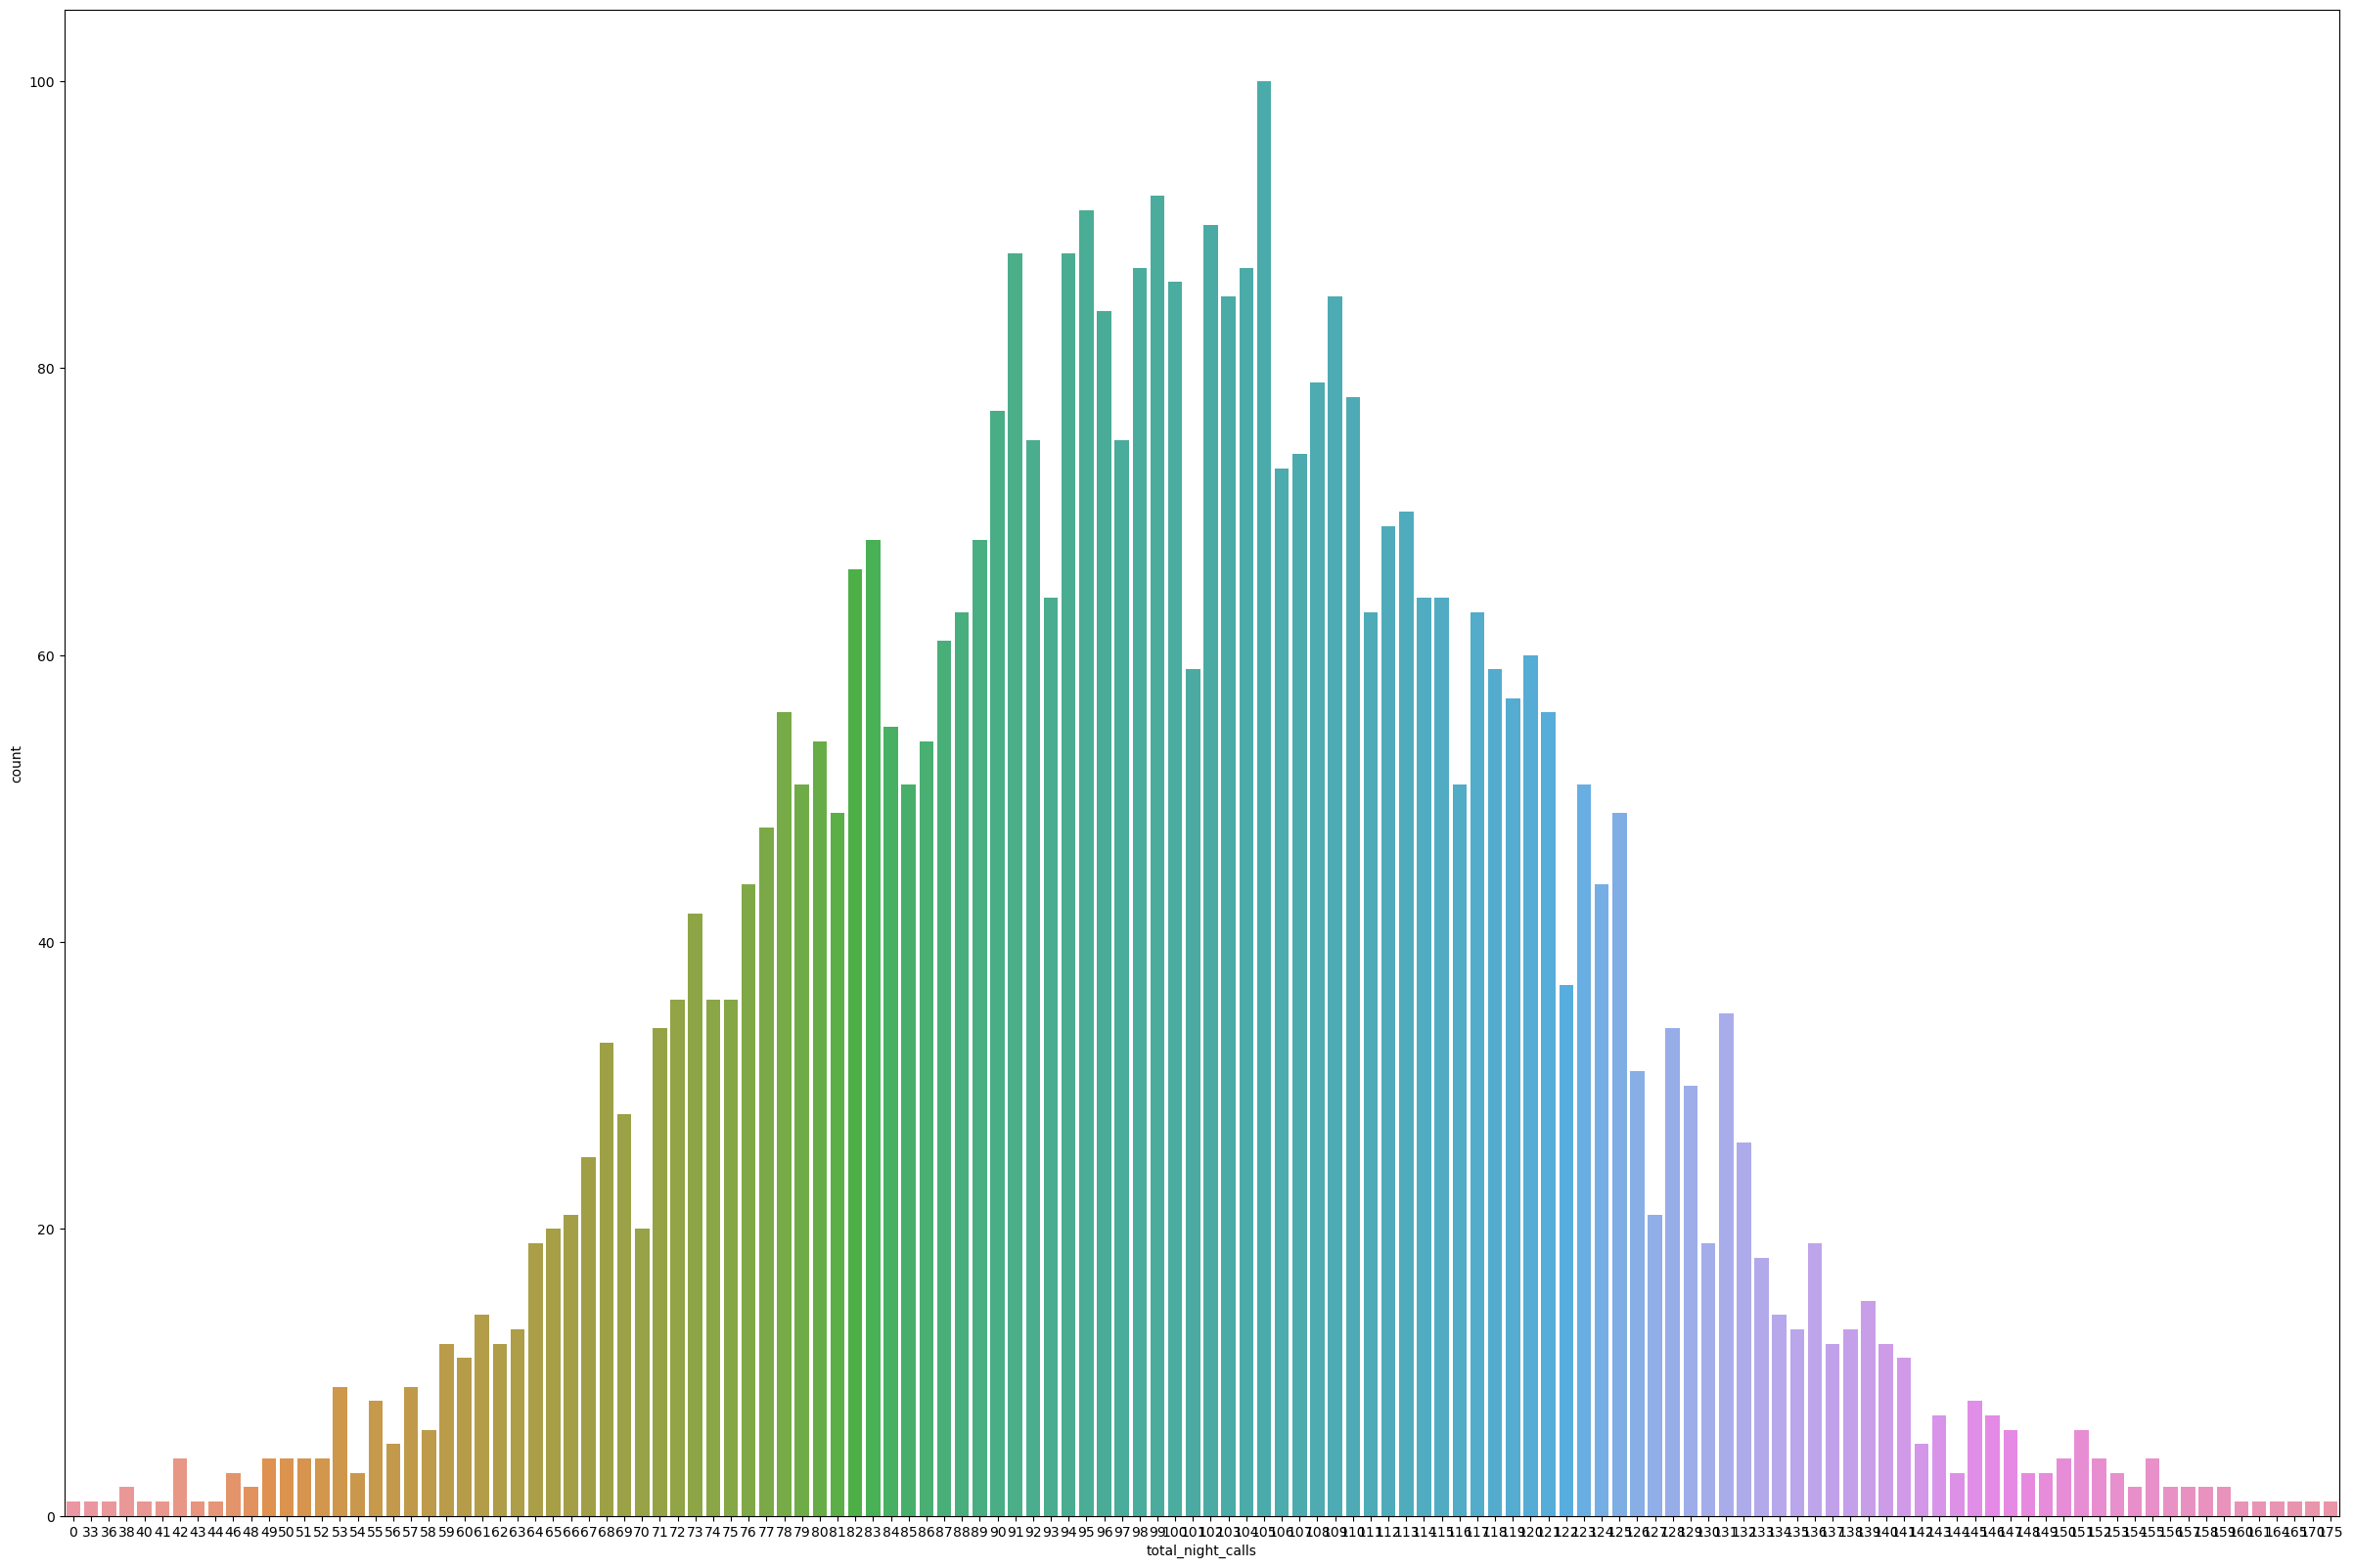


*************************************************************



In [47]:
# Describe the "total_night_calls" column
print("Description of 'total_night_calls' column:")
print(df["total_night_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_night_calls' column
print("Unique values of 'total_night_calls' column:")
print(df["total_night_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_night_calls' column
print("Minimum value of 'total_night_calls' column:", df["total_night_calls"].min())
print("Maximum value of 'total_night_calls' column:", df["total_night_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_night_calls' column
print("Number of unique values in 'total_night_calls' column:", df["total_night_calls"].nunique())

# Plot count of occurrences of "total_night_calls" column
print("\nCount of occurrences of 'total_night_calls' column:")
plt.figure(figsize=(30,20))
sns.countplot(x=df["total_night_calls"])
plt.show()

print("\n*************************************************************\n")



In [48]:
df["total_night_calls"].value_counts()

total_night_calls
105    100
99      92
95      91
102     90
94      88
      ... 
170      1
41       1
165      1
43       1
0        1
Name: count, Length: 128, dtype: int64

# total_night_charge.

In [49]:
# Describe the "total_night_charge" column
print("\nDescription of 'total_night_charge' column:")
print(df["total_night_charge"].describe())

print("\n*************************************************************\n")


print("\n*************************************************************\n")

# Minimum and maximum values of 'total_night_charge' column
print("Minimum value of 'total_night_charge' column:", df["total_night_charge"].min())
print("Maximum value of 'total_night_charge' column:", df["total_night_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_night_charge' column
print("Number of unique values in 'total_night_charge' column:", df["total_night_charge"].nunique())




Description of 'total_night_charge' column:
count    4250.000000
mean        9.023892
std         2.265922
min         0.000000
25%         7.522500
50%         9.020000
75%        10.560000
max        17.770000
Name: total_night_charge, dtype: float64

*************************************************************


*************************************************************

Minimum value of 'total_night_charge' column: 0.0
Maximum value of 'total_night_charge' column: 17.77

*************************************************************

Number of unique values in 'total_night_charge' column: 992



Distribution of 'total_night_charge' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\341864816.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_night_charge"])


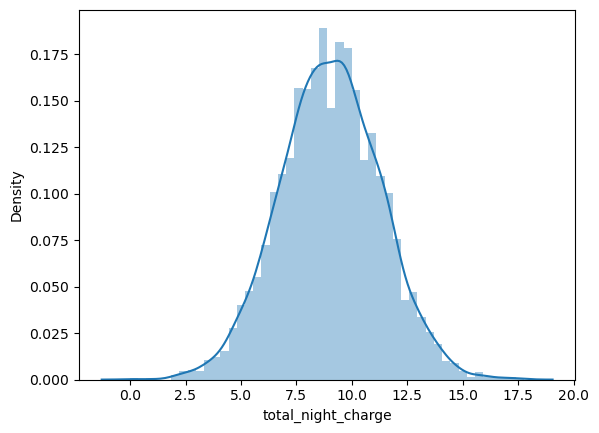


*************************************************************

Skewness of 'total_night_charge' column: 0.008444754040695448


In [50]:
# Plot distribution of "total_night_charge" column
print("\nDistribution of 'total_night_charge' column:")
sns.distplot(df["total_night_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_night_charge" column
print("Skewness of 'total_night_charge' column:", df["total_night_charge"].skew())



# total_intl_minut.

In [51]:
# Describe the "total_intl_minutes" column
print("\nDescription of 'total_intl_minutes' column:")
print(df["total_intl_minutes"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_intl_minutes' column
print("Unique values of 'total_intl_minutes' column:")
print(df["total_intl_minutes"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_intl_minutes' column
print("Minimum value of 'total_intl_minutes' column:", df["total_intl_minutes"].min())
print("Maximum value of 'total_intl_minutes' column:", df["total_intl_minutes"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_intl_minutes' column
print("Number of unique values in 'total_intl_minutes' column:", df["total_intl_minutes"].nunique())




Description of 'total_intl_minutes' column:
count    4250.000000
mean       10.256071
std         2.760102
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: total_intl_minutes, dtype: float64

*************************************************************

Unique values of 'total_intl_minutes' column:
[13.7 12.2  6.6 10.1  7.5  7.1  8.7 11.2 12.7  9.1 12.3  5.4 13.8 10.
 13.  10.6  5.7  9.5  7.7 10.3 14.7  6.3 11.1 11.8  8.3 14.5 10.5  9.4
 14.6  9.2  3.5  8.5 13.2  7.4 11.   7.8  6.8 11.4  9.3 10.2  8.   5.8
 12.  11.6 12.6  8.2  6.2 12.1  7.3  6.1 11.7 15.   9.8  8.6 10.9 13.9
  8.9  7.9  5.3  4.4 12.5 11.3  9.   9.6 13.3 20.  14.2 13.1  7.2  6.4
 12.4 14.1  6.9 11.5 15.8 12.8 16.2  0.  11.9  9.9  8.4 10.8  8.8 13.4
  9.7 10.7  4.7  2.7 13.5 12.9 14.4 10.4  6.7 15.4  6.5 15.6  5.9 18.9
  7.6  7.  14.  18.  14.8  3.7  4.8  5.  16.  15.3 14.3 13.6 17.2  8.1
 17.5  5.6 18.2  3.6 16.5  4.6  5.1  4.1  6.  15.5 16.3 16.4 16.7  1.


Distribution of 'total_intl_minutes' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\1535575811.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_intl_minutes"])


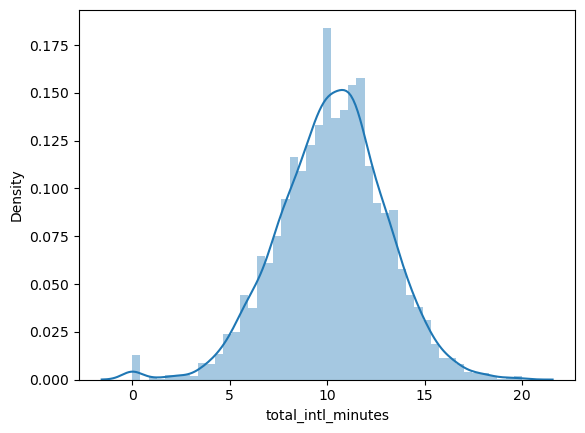


*************************************************************

Skewness of 'total_intl_minutes' column: -0.2413595393894869


In [52]:
# Plot distribution of "total_intl_minutes" column
print("\nDistribution of 'total_intl_minutes' column:")
sns.distplot(df["total_intl_minutes"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_intl_minutes" column
print("Skewness of 'total_intl_minutes' column:", df["total_intl_minutes"].skew())



# total_intl_calls

Description of 'total_intl_calls' column:
count    4250.000000
mean        4.426353
std         2.463069
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total_intl_calls, dtype: float64

*************************************************************

Unique values of 'total_intl_calls' column:
[ 3  5  7  6  4  2  9 19  1 15  8 10 11  0 12 13 18 14 16 20 17]

*************************************************************

Minimum value of 'total_intl_calls' column: 0
Maximum value of 'total_intl_calls' column: 20

*************************************************************

Number of unique values in 'total_intl_calls' column: 21

Count of occurrences of 'total_intl_calls' column:


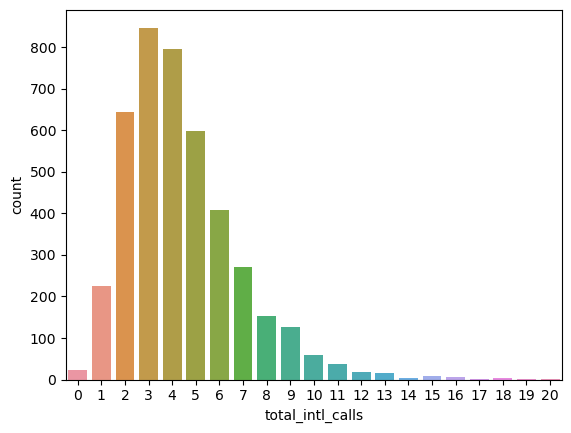


*************************************************************



In [53]:
# Describe the "total_intl_calls" column
print("Description of 'total_intl_calls' column:")
print(df["total_intl_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_intl_calls' column
print("Unique values of 'total_intl_calls' column:")
print(df["total_intl_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_intl_calls' column
print("Minimum value of 'total_intl_calls' column:", df["total_intl_calls"].min())
print("Maximum value of 'total_intl_calls' column:", df["total_intl_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_intl_calls' column
print("Number of unique values in 'total_intl_calls' column:", df["total_intl_calls"].nunique())

# Plot count of occurrences of "total_intl_calls" column
print("\nCount of occurrences of 'total_intl_calls' column:")
sns.countplot(x=df["total_intl_calls"])
plt.show()

print("\n*************************************************************\n")



# total_intl_charge.

In [54]:
# Describe the "total_intl_charge" column
print("\nDescription of 'total_intl_charge' column:")
print(df["total_intl_charge"].describe())

print("\n*************************************************************\n")

# Unique values of 'total_intl_charge' column
print("Unique values of 'total_intl_charge' column:")
print(df["total_intl_charge"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'total_intl_charge' column
print("Minimum value of 'total_intl_charge' column:", df["total_intl_charge"].min())
print("Maximum value of 'total_intl_charge' column:", df["total_intl_charge"].max())

print("\n*************************************************************\n")

# Number of unique values in 'total_intl_charge' column
print("Number of unique values in 'total_intl_charge' column:", df["total_intl_charge"].nunique())




Description of 'total_intl_charge' column:
count    4250.000000
mean        2.769654
std         0.745204
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: total_intl_charge, dtype: float64

*************************************************************

Unique values of 'total_intl_charge' column:
[3.7  3.29 1.78 2.73 2.03 1.92 2.35 3.02 3.43 2.46 3.32 1.46 3.73 2.7
 3.51 2.86 1.54 2.57 2.08 2.78 3.97 1.7  3.   3.19 2.24 3.92 2.84 2.54
 3.94 2.48 0.95 2.3  3.56 2.   2.97 2.11 1.84 3.08 2.51 2.75 2.16 1.57
 3.24 3.13 3.4  2.21 1.67 3.27 1.97 1.65 3.16 4.05 2.65 2.32 2.94 3.75
 2.4  2.13 1.43 1.19 3.38 3.05 2.43 2.59 3.59 5.4  3.83 3.54 1.94 1.73
 3.35 3.81 1.86 3.11 4.27 3.46 4.37 0.   3.21 2.67 2.27 2.92 2.38 3.62
 2.62 2.89 1.27 0.73 3.65 3.48 3.89 2.81 1.81 4.16 1.76 4.21 1.59 5.1
 2.05 1.89 3.78 4.86 4.   1.   1.3  1.35 4.32 4.13 3.86 3.67 4.64 2.19
 4.73 1.51 4.91 0.97 4.46 1.24 1.38 1.11 1.62 4.19 4.4  4.43 4.51 0.35
 4


Distribution of 'total_intl_charge' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\641496495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_intl_charge"])


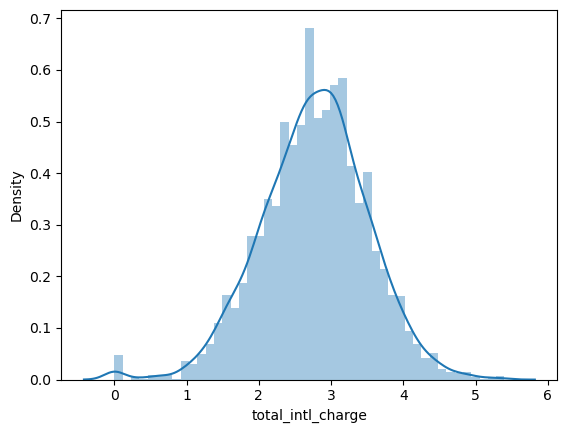


*************************************************************

Skewness of 'total_intl_charge' column: -0.2416706660676994


In [55]:
# Plot distribution of "total_intl_charge" column
print("\nDistribution of 'total_intl_charge' column:")
sns.distplot(df["total_intl_charge"])
plt.show()

print("\n*************************************************************\n")

# Skewness of "total_intl_charge" column
print("Skewness of 'total_intl_charge' column:", df["total_intl_charge"].skew())


# number_customer_service_calls

Description of 'number_customer_service_calls' column:
count    4250.000000
mean        1.559059
std         1.311434
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: number_customer_service_calls, dtype: float64

*************************************************************

Unique values of 'number_customer_service_calls' column:
[1 0 2 3 4 5 7 9 6 8]

*************************************************************

Minimum value of 'number_customer_service_calls' column: 0
Maximum value of 'number_customer_service_calls' column: 9

*************************************************************

Number of unique values in 'number_customer_service_calls' column: 10

Count of occurrences of 'number_customer_service_calls' column:


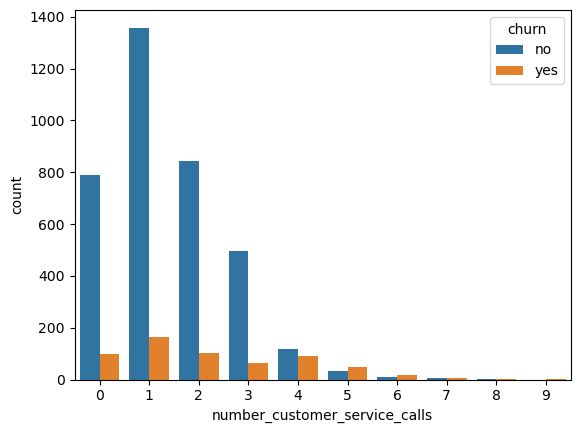


*************************************************************



In [56]:
# Describe the "number_customer_service_calls" column
print("Description of 'number_customer_service_calls' column:")
print(df["number_customer_service_calls"].describe())

print("\n*************************************************************\n")

# Unique values of 'number_customer_service_calls' column
print("Unique values of 'number_customer_service_calls' column:")
print(df["number_customer_service_calls"].unique())

print("\n*************************************************************\n")

# Minimum and maximum values of 'number_customer_service_calls' column
print("Minimum value of 'number_customer_service_calls' column:", df["number_customer_service_calls"].min())
print("Maximum value of 'number_customer_service_calls' column:", df["number_customer_service_calls"].max())

print("\n*************************************************************\n")

# Number of unique values in 'number_customer_service_calls' column
print("Number of unique values in 'number_customer_service_calls' column:", df["number_customer_service_calls"].nunique())

# Plot count of occurrences of "number_customer_service_calls" column
print("\nCount of occurrences of 'number_customer_service_calls' column:")
sns.countplot(x=df["number_customer_service_calls"],hue=df["churn"])
plt.show()

print("\n*************************************************************\n")


In [57]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

# bivariate analysis

In [58]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


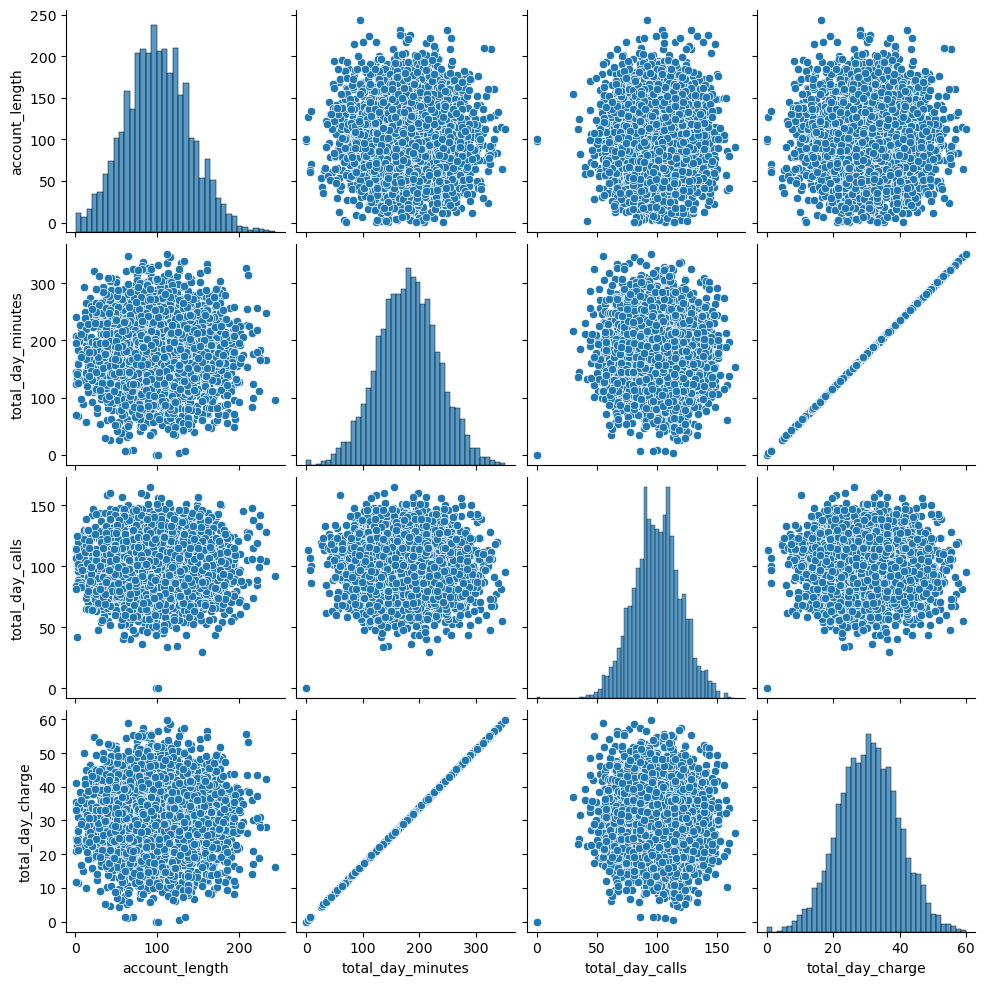

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for pair plot
columns_for_pairplot = ['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge']

# Add 'state' and 'area_code' if you want to include them
# columns_for_pairplot += ['state', 'area_code']

# Create pair plot
sns.pairplot(df[columns_for_pairplot])
plt.show()


C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


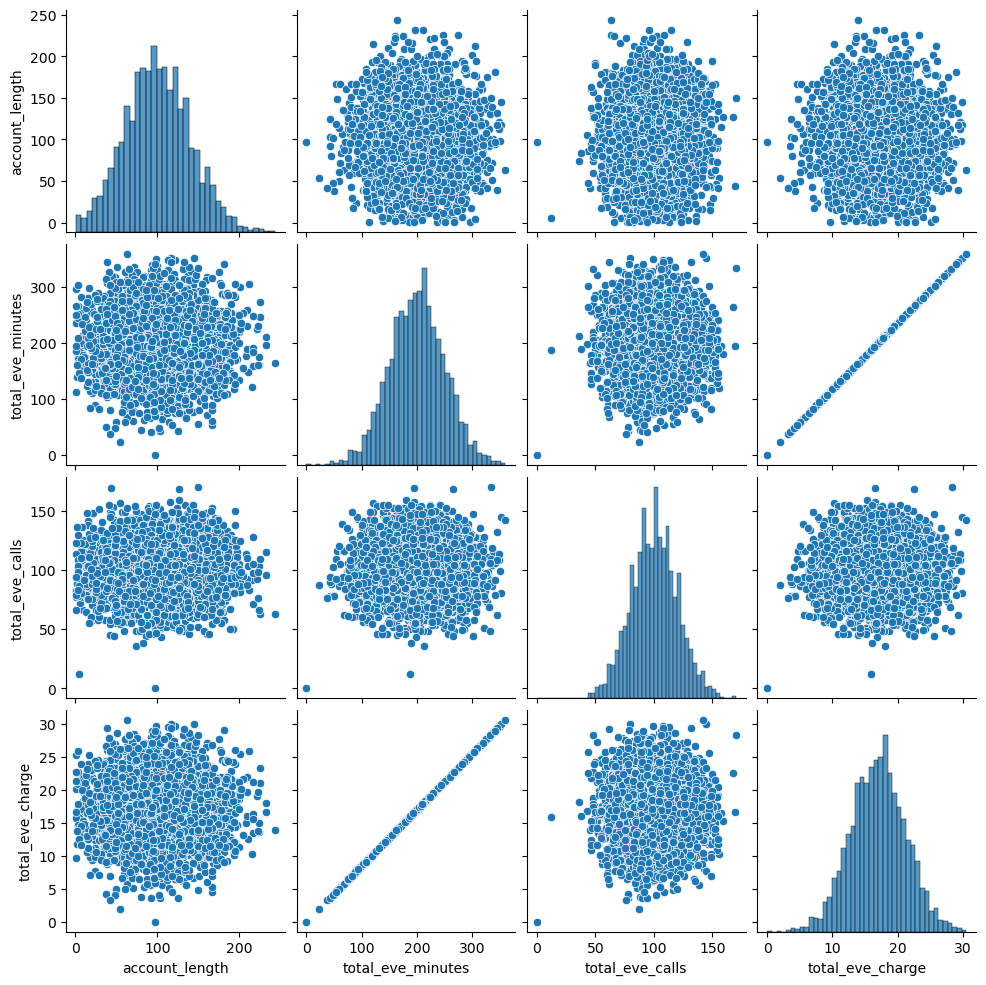

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for pair plot
columns_for_pairplot = ['account_length', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge']

# Create pair plot
sns.pairplot(df[columns_for_pairplot])
plt.show()


C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


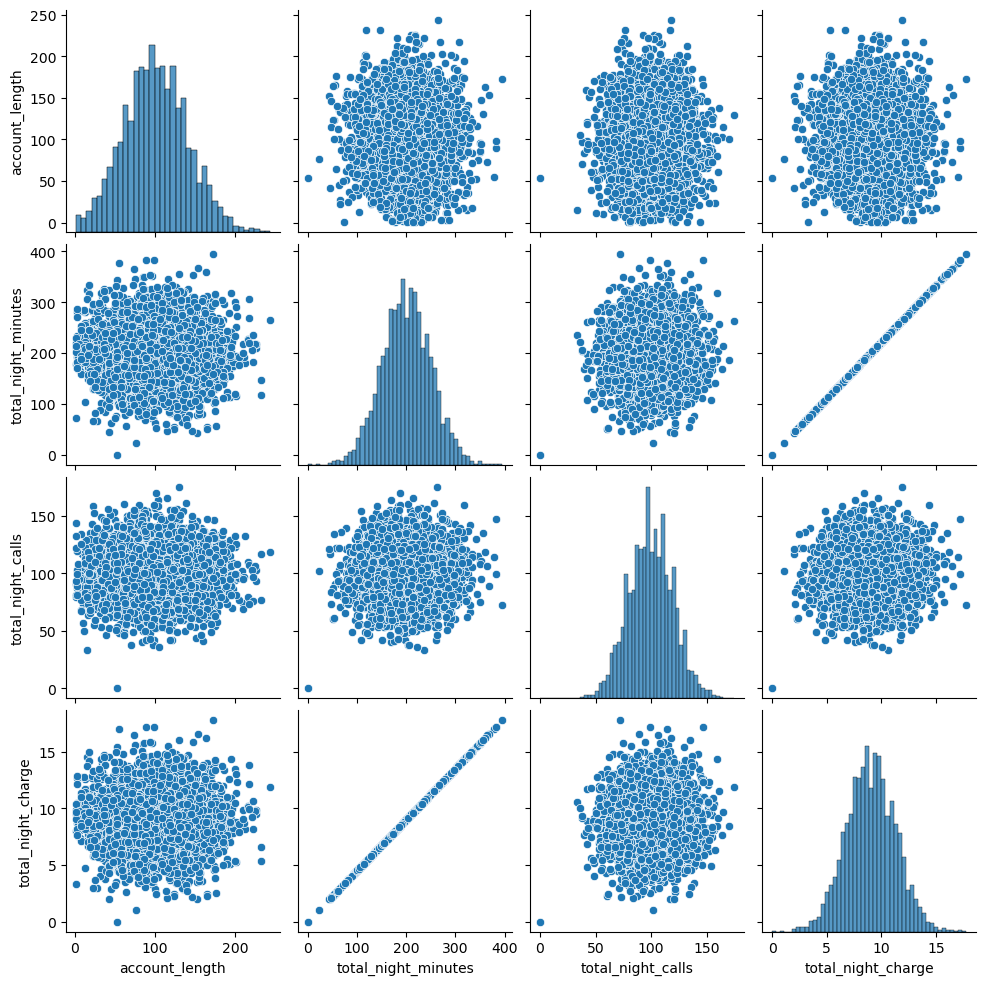

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for pair plot
columns_for_pairplot = ['account_length', 'total_night_minutes', 'total_night_calls', 'total_night_charge']

# Create pair plot
sns.pairplot(df[columns_for_pairplot])
plt.show()


C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


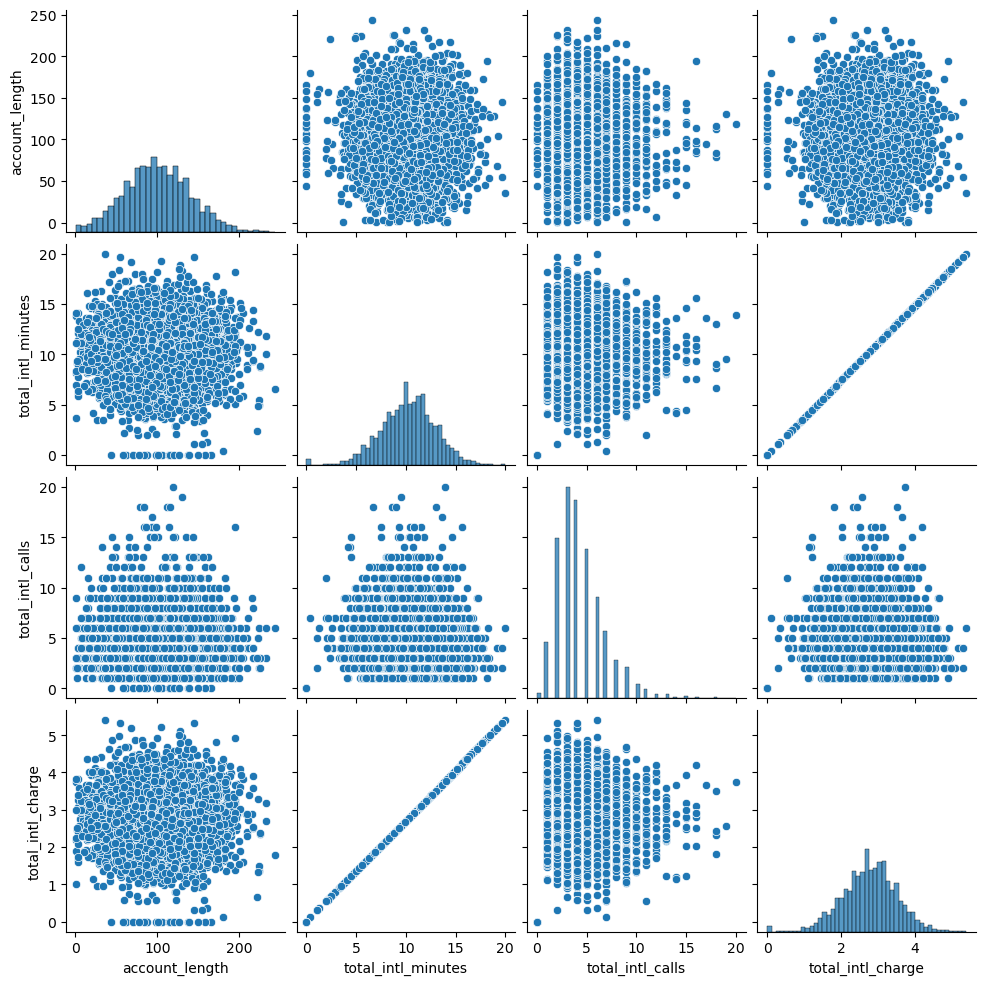

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for pair plot
columns_for_pairplot = ['account_length', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']

# Create pair plot
sns.pairplot(df[columns_for_pairplot])
plt.show()


In [63]:
# completed scatter plots
# needd to see the outliers tomarrow

In [64]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

<Axes: xlabel='total_day_minutes', ylabel='total_eve_minutes'>

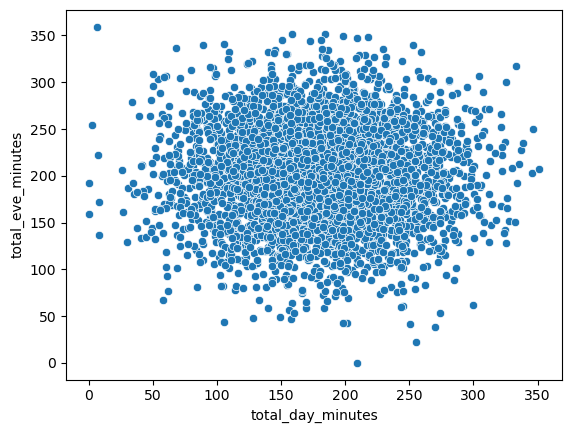

In [65]:
sns.scatterplot(x='total_day_minutes', y='total_eve_minutes', data=df)

Text(0.5, 1.0, 'scatter plot')

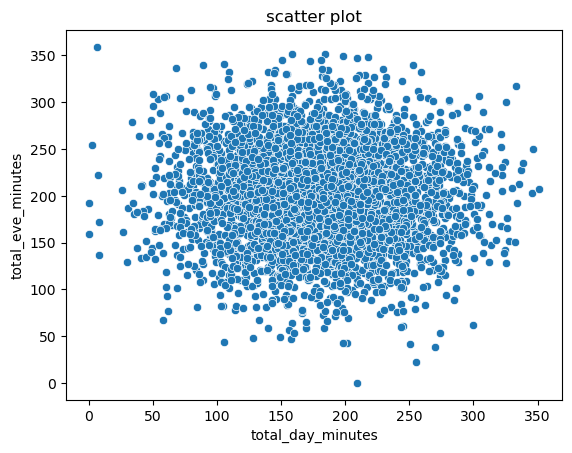

In [66]:
sns.scatterplot(x='total_day_minutes', y='total_eve_minutes', data=df)
plt.title("scatter plot")

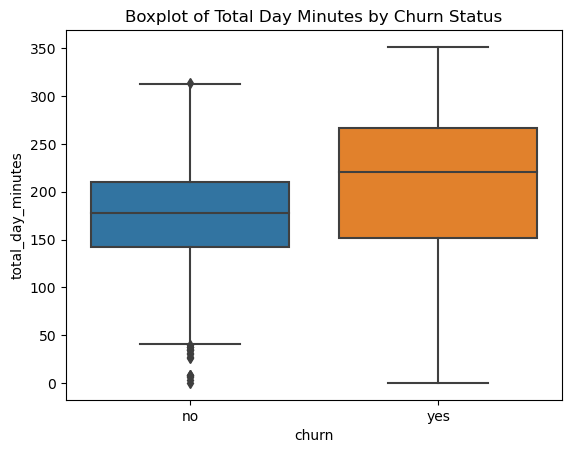

In [67]:
sns.boxplot(x='churn', y='total_day_minutes', data=df)
plt.title('Boxplot of Total Day Minutes by Churn Status')
plt.show()

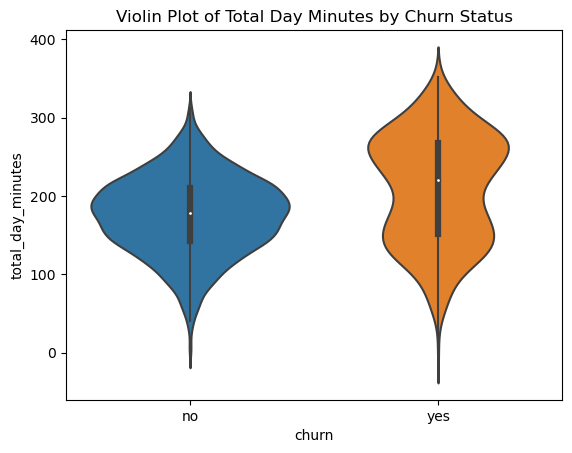

In [68]:
sns.violinplot(x='churn', y='total_day_minutes', data=df)
plt.title('Violin Plot of Total Day Minutes by Churn Status')
plt.show()

# capping the outliers

In [69]:
df2=df.drop(['state', 'churn', 'international_plan', 'voice_mail_plan'],axis=1)

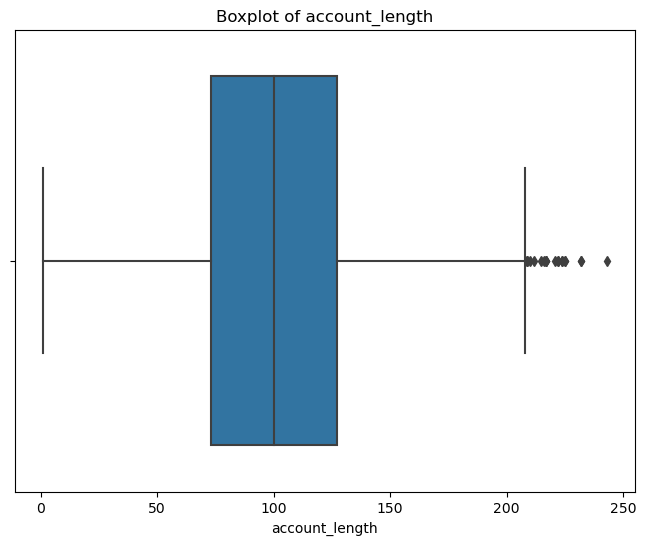

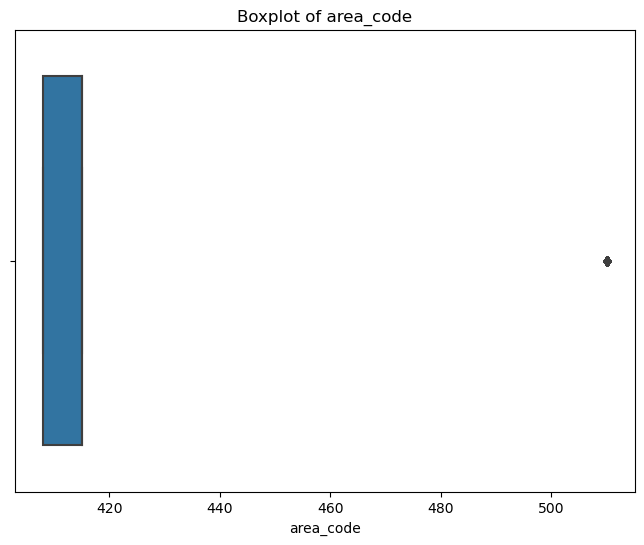

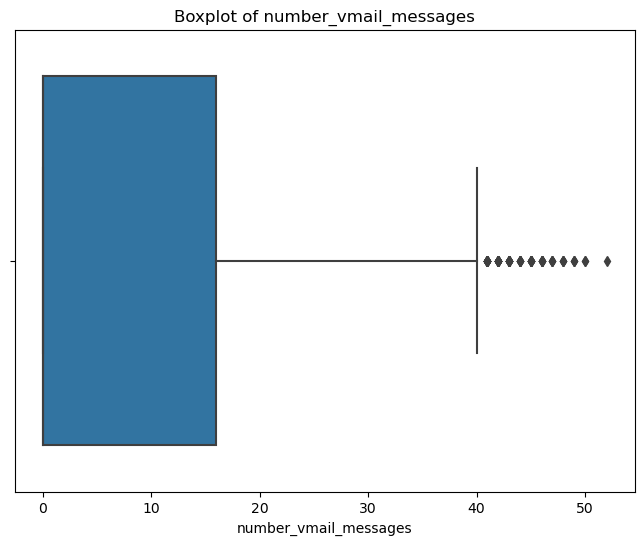

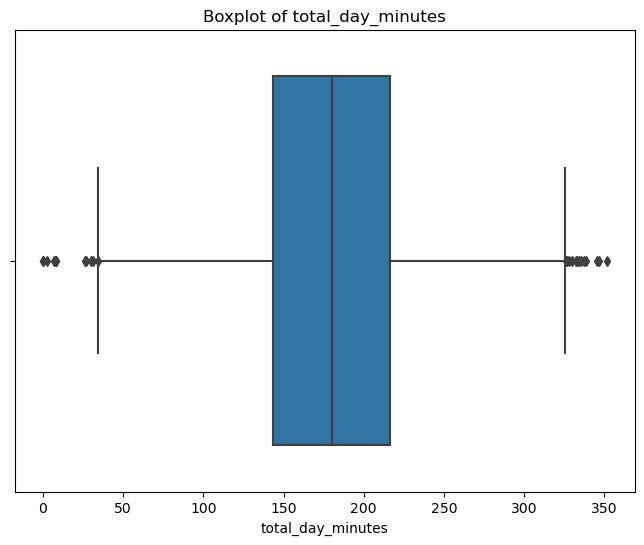

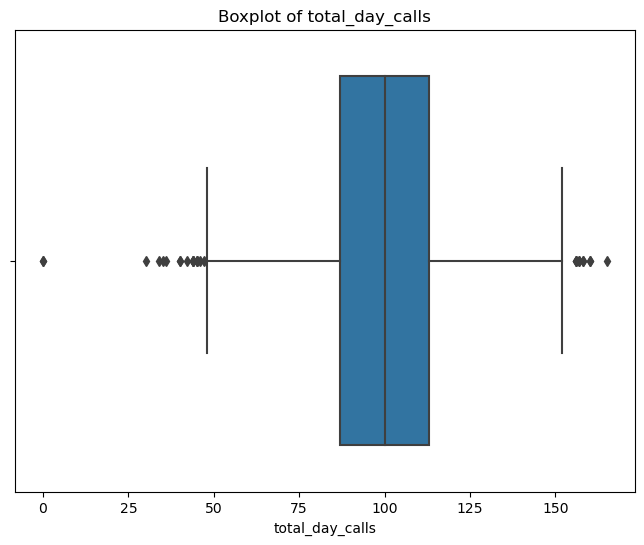

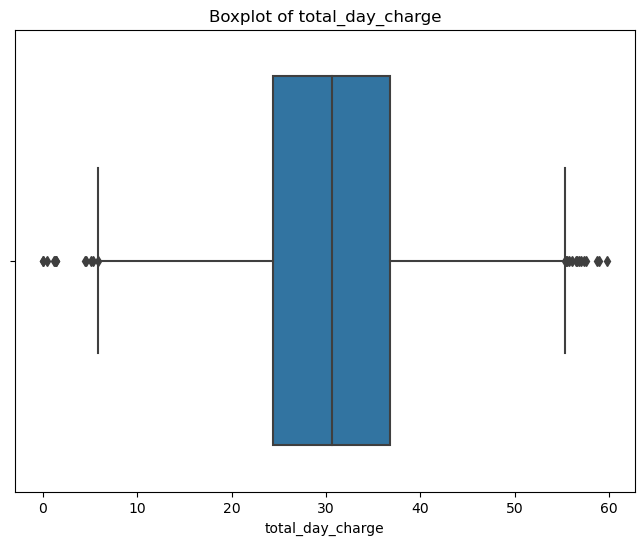

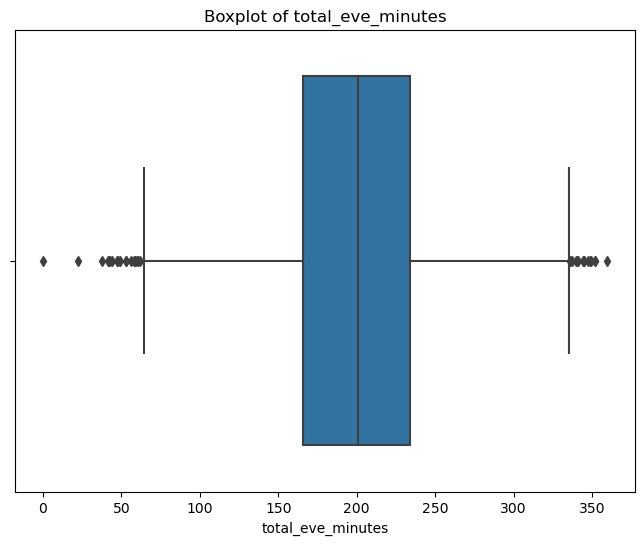

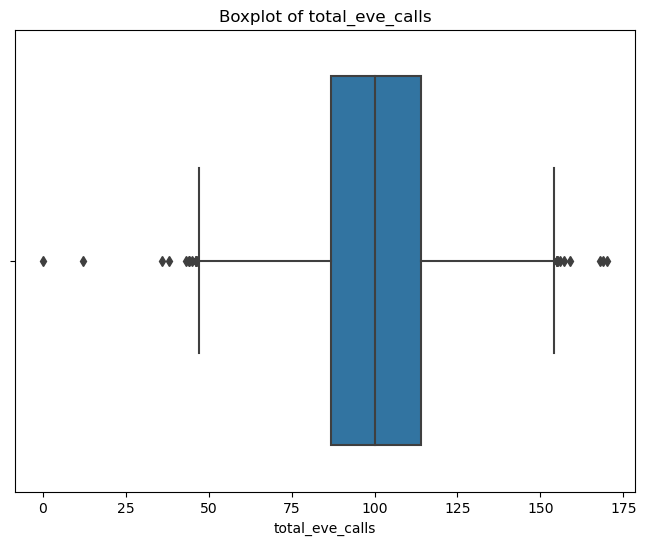

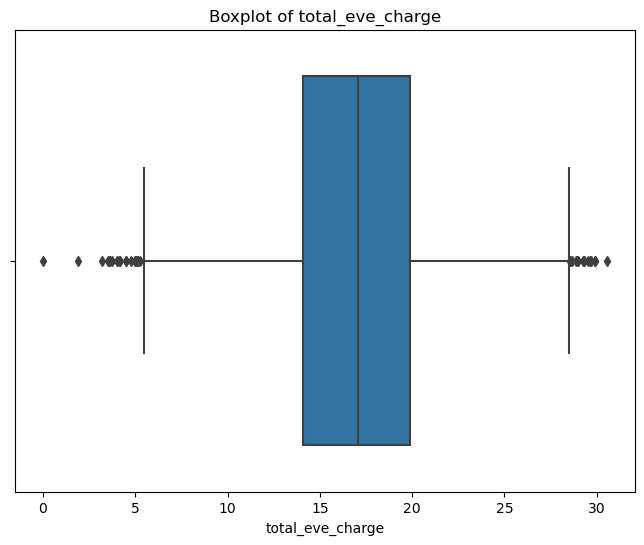

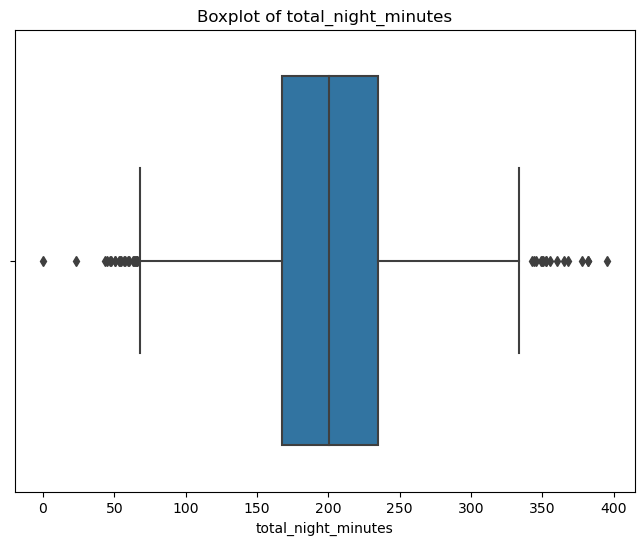

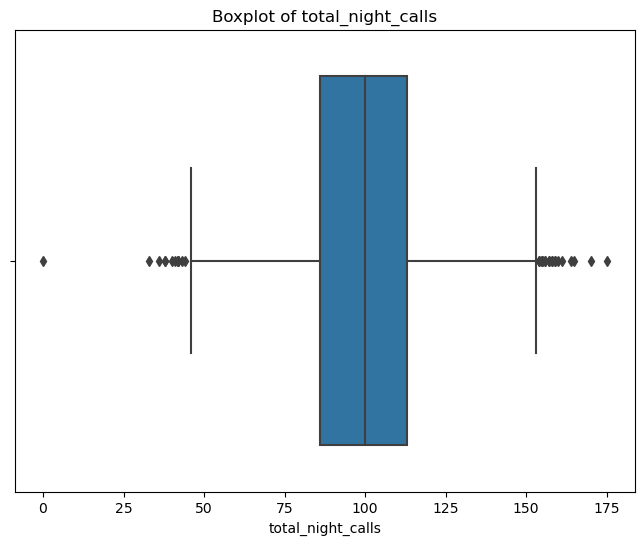

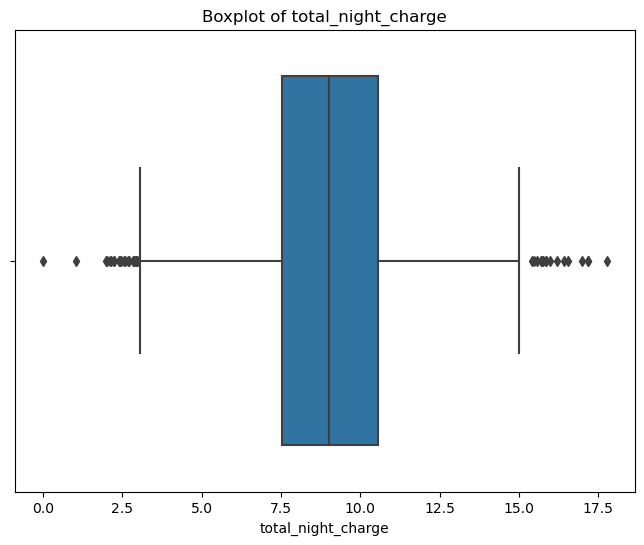

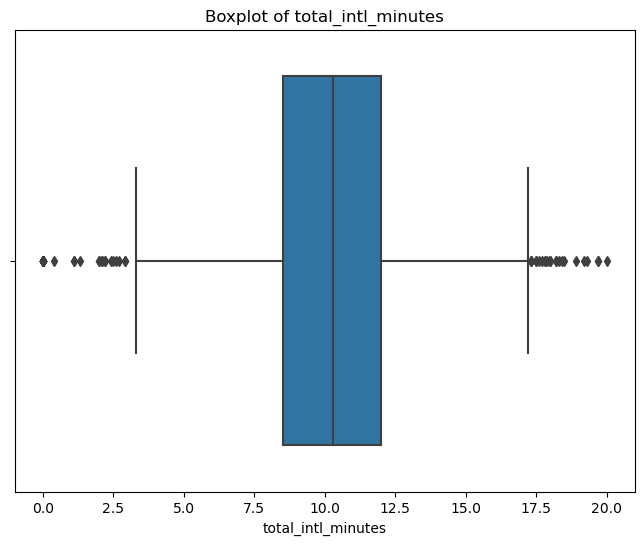

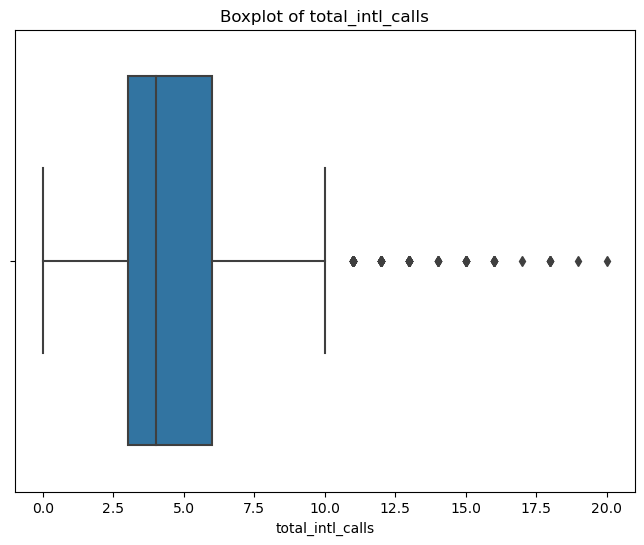

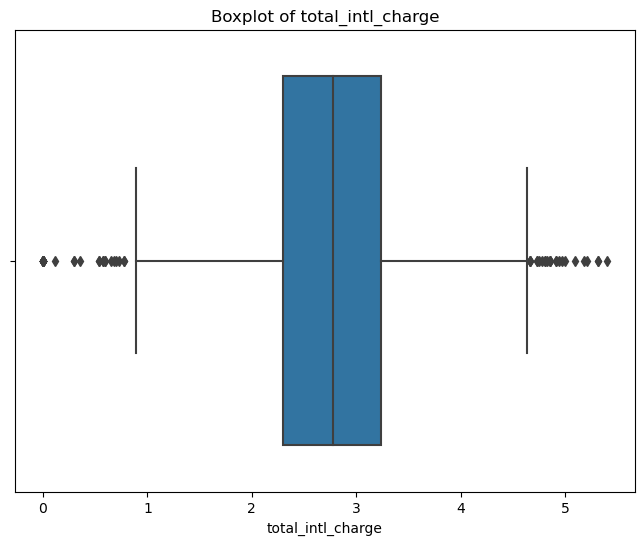

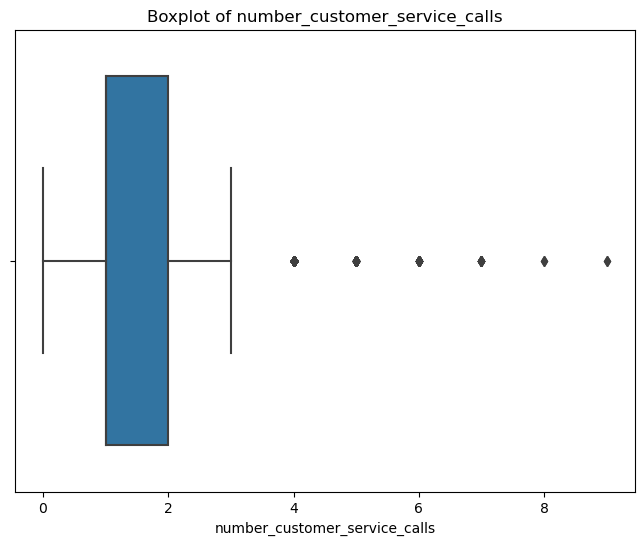

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


for i in df2.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()


In [71]:
import numpy as np

def iqr(column):
    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    rang = q3 - q1
    right = q3 + rang * 1.5
    left = q1 - rang * 1.5

    # Cap extreme values
    column[column > right] = right
    column[column < left] = left

    return column


In [72]:
for i in df2:
    
    df[i] = iqr(df[i])


C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\644847747.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\644847747.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < left] = left
C:\Users\jeeva\AppData\Local\Temp\ipykernel_13772\644847747.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\

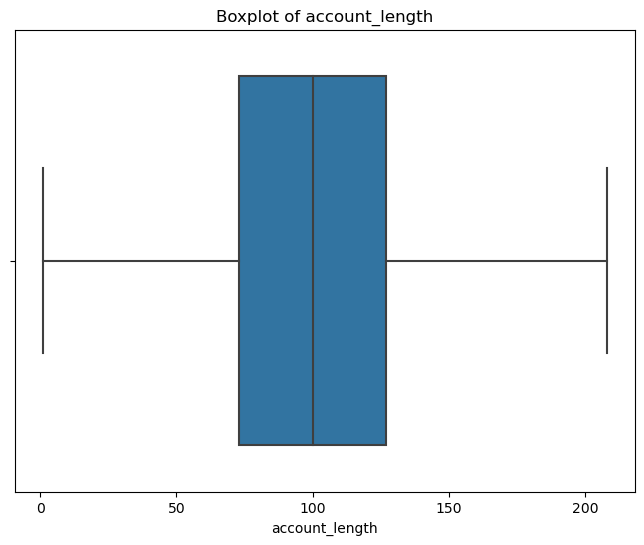

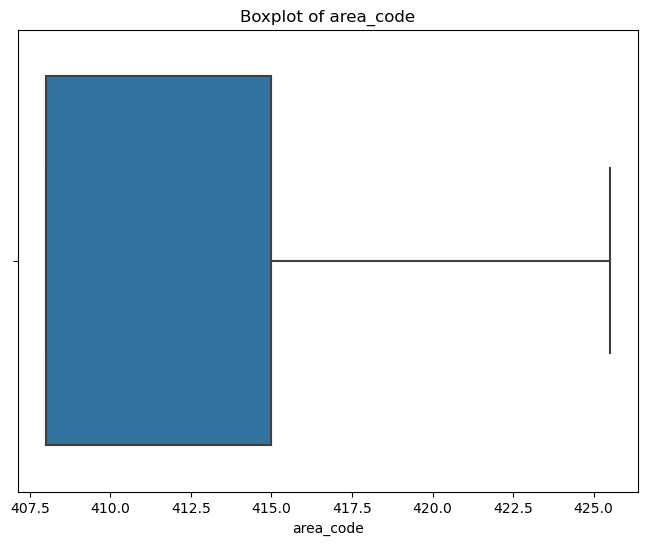

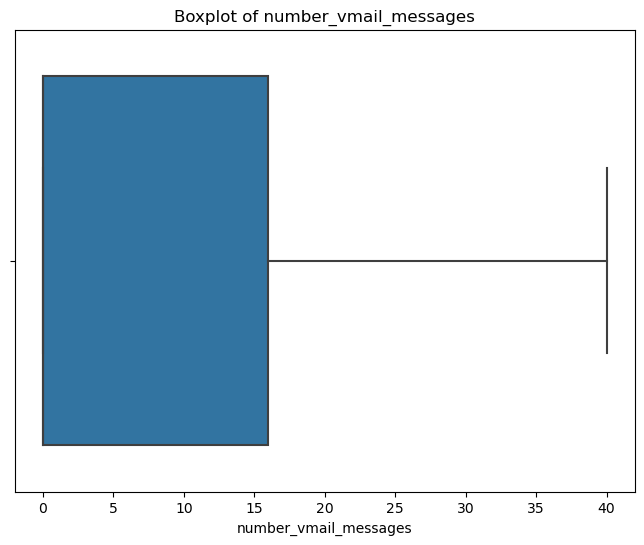

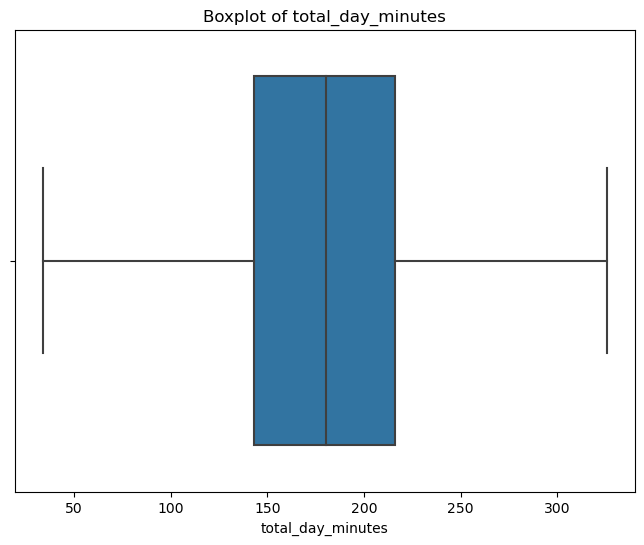

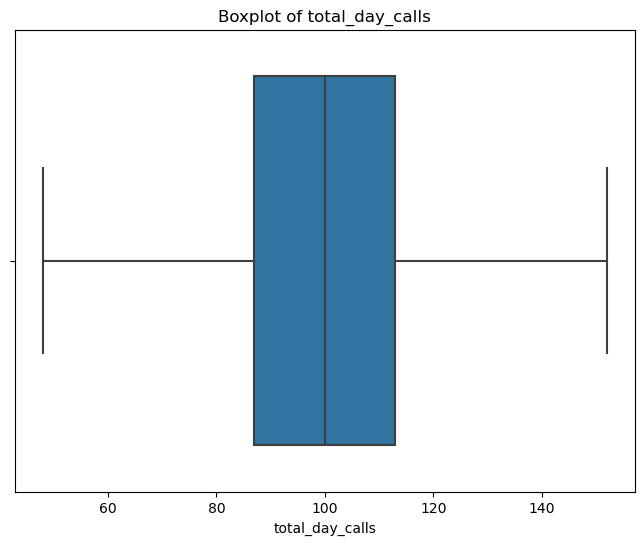

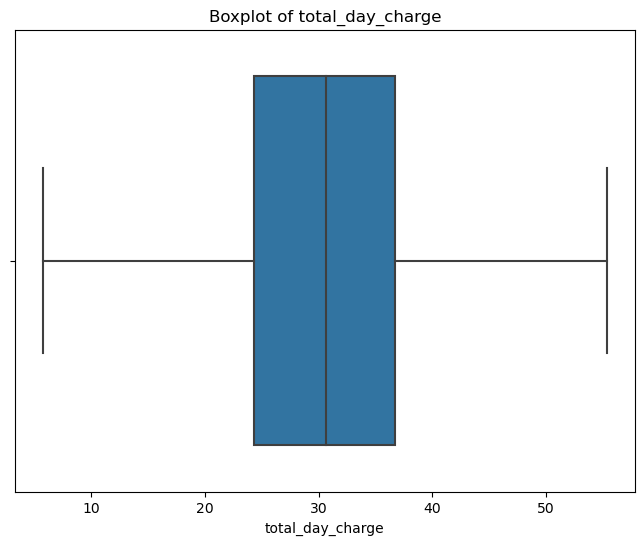

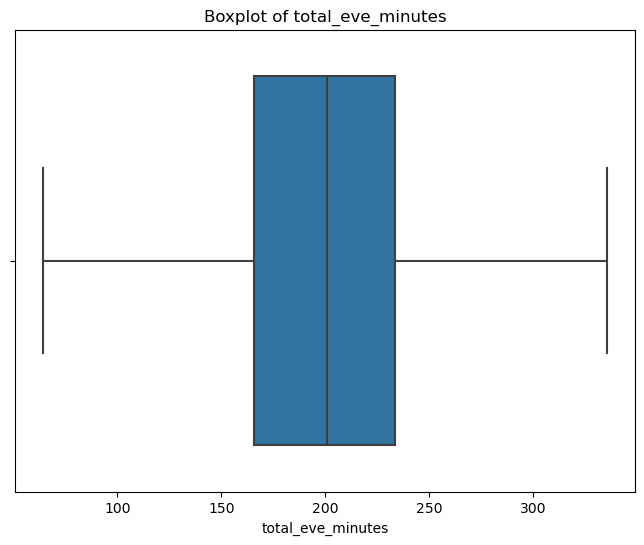

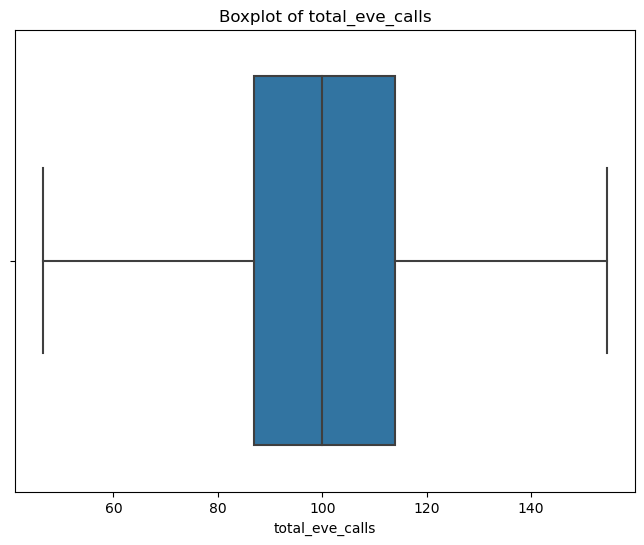

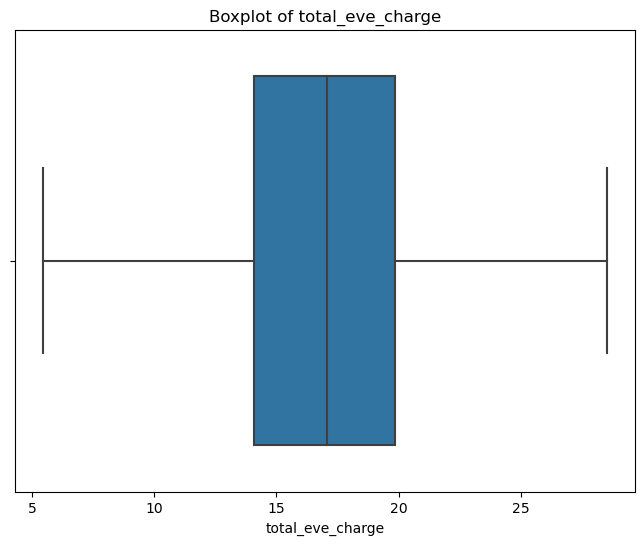

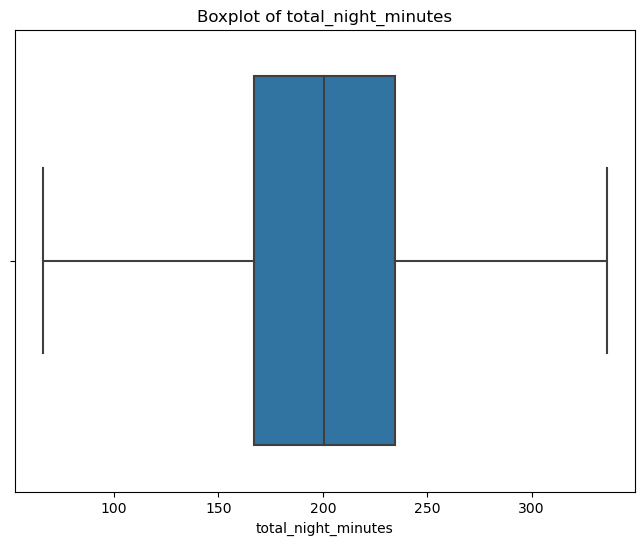

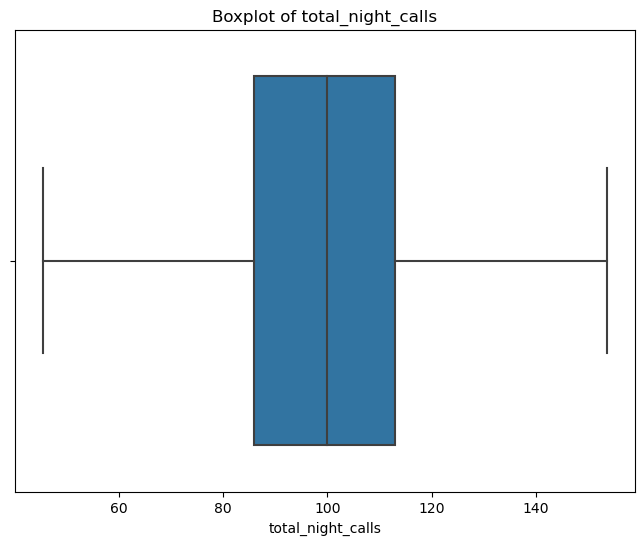

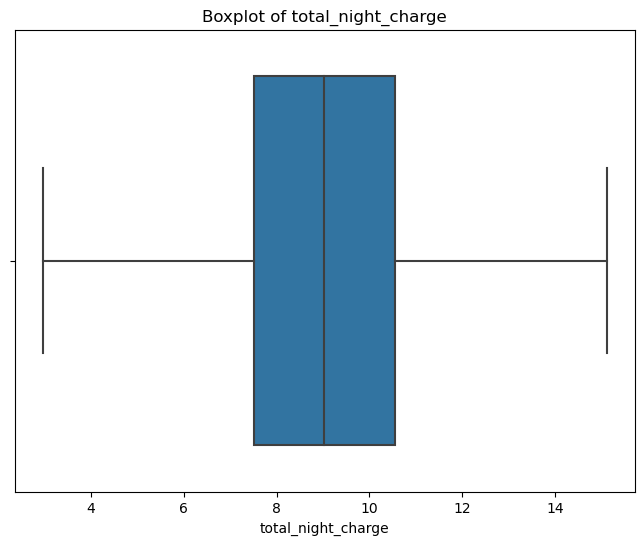

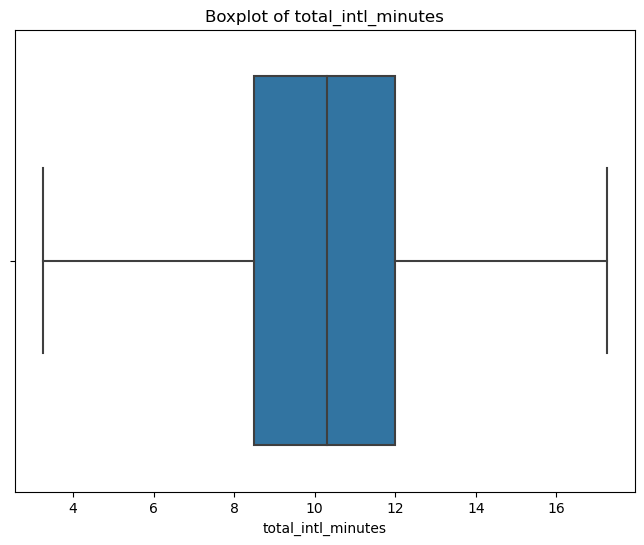

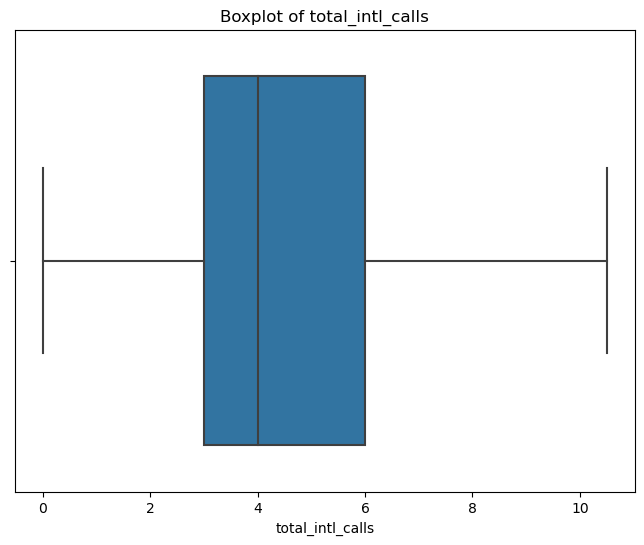

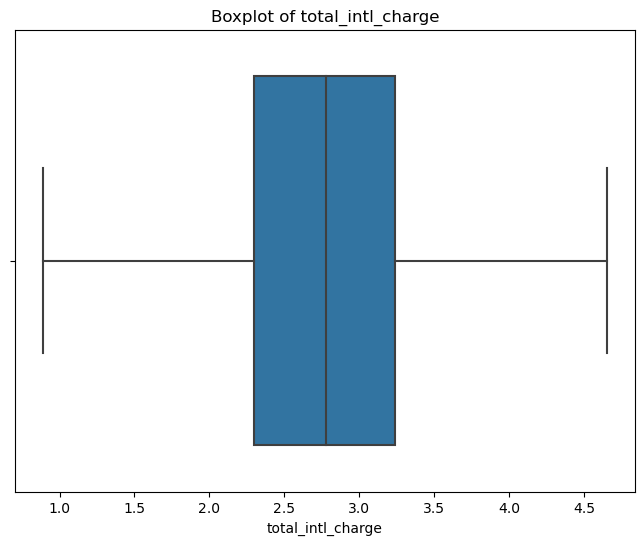

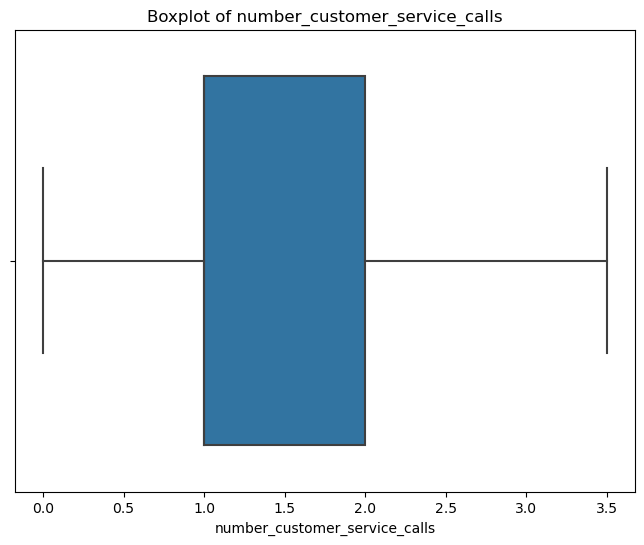

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


for i in df2.columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()


In [74]:
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.179529,415.820235,7.554118,180.281979,99.940235,30.648467,200.217200,100.190118,17.018678,200.504556,99.838941,9.022821,10.271812,4.370588,2.773972,1.474000
std,39.530976,6.265084,13.234796,53.763629,19.649367,9.139651,49.927189,19.776787,4.243726,49.861498,19.929176,2.243829,2.677155,2.267700,0.722405,1.106675
min,1.000000,408.000000,0.000000,34.012500,48.000000,5.787500,64.150000,46.500000,5.455000,66.012500,45.500000,2.966250,3.250000,0.000000,0.890000,0.000000
25%,73.000000,408.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,415.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,208.000000,425.500000,40.000000,325.512500,152.000000,55.327500,335.550000,154.500000,28.515000,335.912500,153.500000,15.116250,17.250000,10.500000,4.650000,3.500000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   float64
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   float64
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

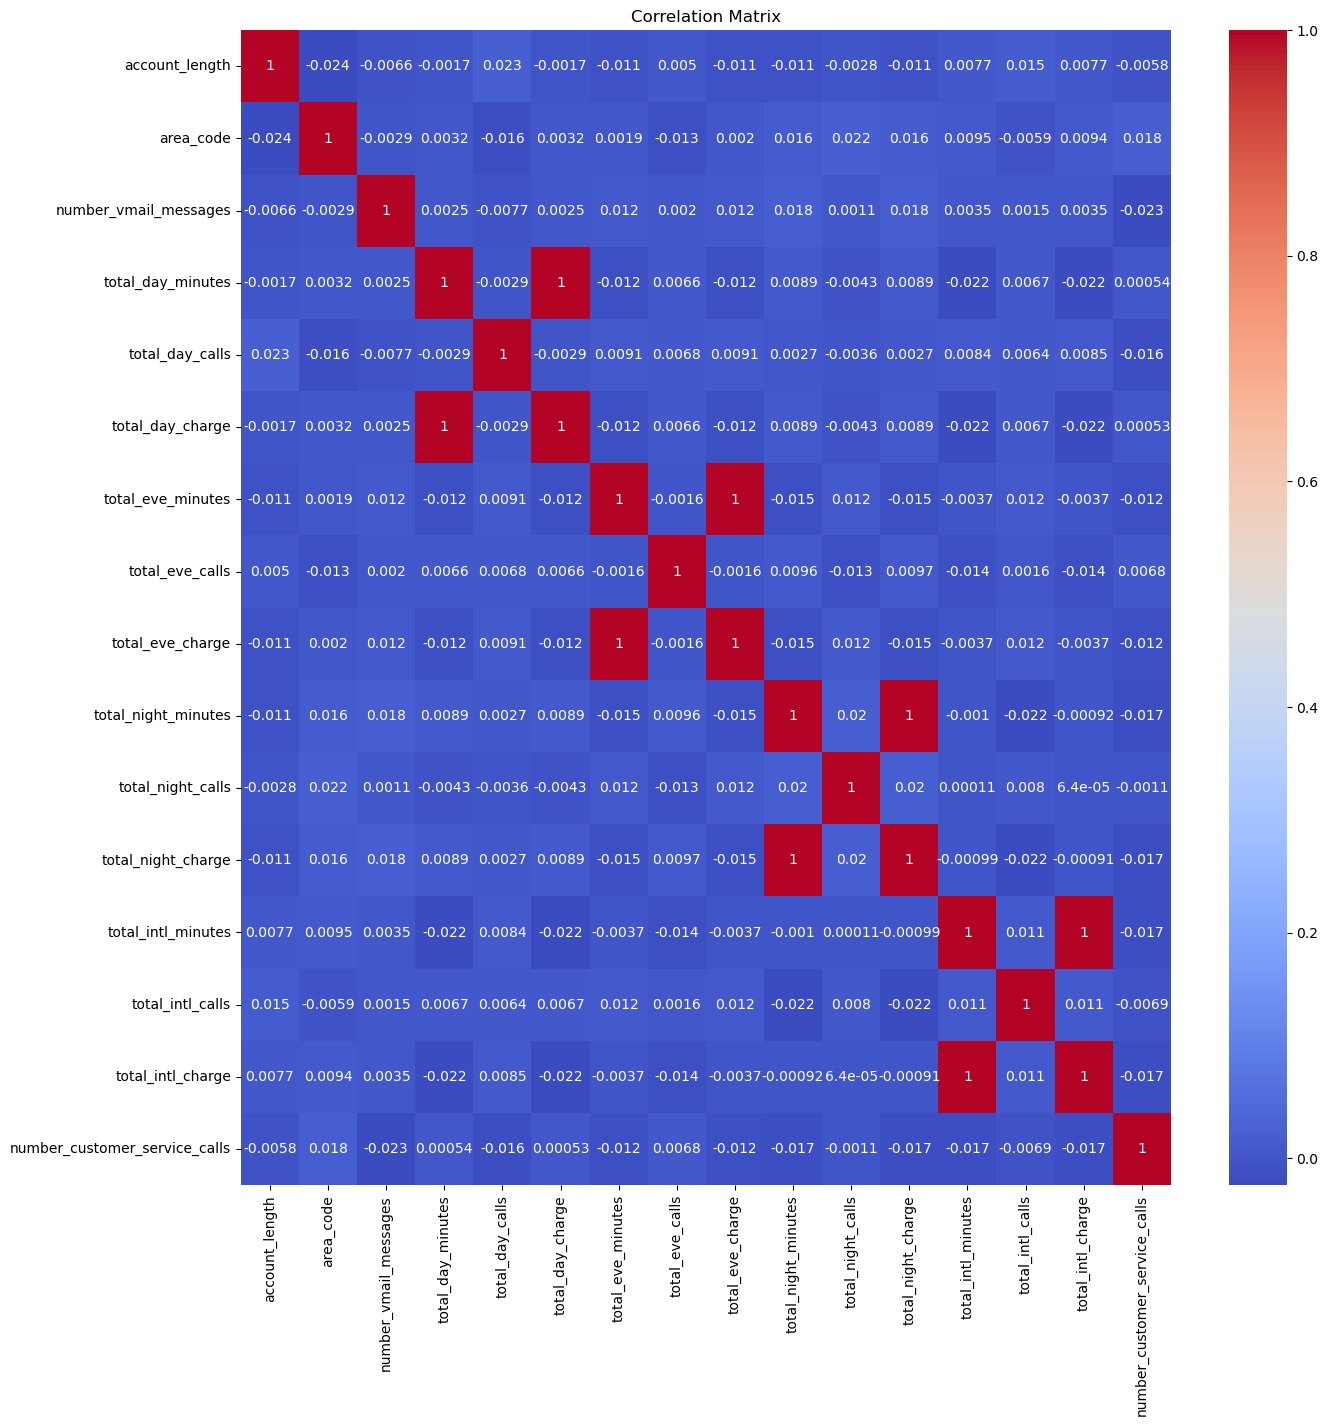

In [76]:
# One-hot encode categorical variables
df2=df.drop(['state', 'churn', 'international_plan', 'voice_mail_plan'],axis=1)

# Compute correlation matrix
correlation_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# feature creation

In [77]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [78]:
len(df)

4250

In [79]:
l_total_min=[df["total_day_minutes"][i]+df['total_eve_minutes'][i]+df['total_night_minutes'][i] for i in range(len(df))]

In [80]:
l_total_call=[df["total_day_calls"][i]+df['total_eve_calls'][i]+df['total_night_calls'][i] for i in range(len(df))]

In [81]:
l_total_charge=[df["total_day_charge"][i]+df['total_eve_charge'][i]+df['total_night_charge'][i] for i in range(len(df))]

In [82]:
df["total_min"]=l_total_min
df["total_call"]=l_total_call
df["total_charge"]=l_total_charge

In [83]:
l_days=[i*30 for i in df["account_length"]]

In [84]:
l_weeks=[i/4 for i in df["account_length"]]

In [85]:
l_year=[i/12 for i in df["account_length"]]

In [86]:
df["plan_day"]=l_days

In [87]:
df["plan_weeks"]=l_weeks

In [88]:
df["plan_years"]=l_year

In [89]:
l_charge_day=df["total_charge"]/df["plan_day"]

In [90]:
df["charge_day"]=l_charge_day

In [91]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_charge,number_customer_service_calls,churn,total_min,total_call,total_charge,plan_day,plan_weeks,plan_years,charge_day
0,OH,107,415.0,no,yes,26,161.6,123,27.47,195.50,...,3.70,1.0,no,611.50,329.0,55.540,3210,26.75,8.916667,0.017302
1,NJ,137,415.0,no,no,0,243.4,114,41.38,121.20,...,3.29,0.0,no,527.20,328.0,59.000,4110,34.25,11.416667,0.014355
2,OH,84,408.0,yes,no,0,299.4,71,50.90,64.15,...,1.78,2.0,no,560.45,248.0,65.215,2520,21.00,7.000000,0.025879
3,OK,75,415.0,yes,no,0,166.7,113,28.34,148.30,...,2.73,3.0,no,501.90,356.0,49.360,2250,18.75,6.250000,0.021938
4,MA,121,425.5,no,yes,24,218.2,88,37.09,335.55,...,2.03,3.0,no,766.35,314.0,75.175,3630,30.25,10.083333,0.020709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,415.0,no,no,0,188.3,70,32.01,243.80,...,2.78,0.0,no,645.80,237.0,62.350,2490,20.75,6.916667,0.025040
4246,WV,73,408.0,no,no,0,177.9,89,30.24,131.20,...,3.11,3.0,no,495.30,260.0,49.770,2190,18.25,6.083333,0.022726
4247,NC,75,408.0,no,no,0,170.7,101,29.02,193.10,...,1.86,1.0,no,492.90,331.0,51.240,2250,18.75,6.250000,0.022773
4248,HI,50,408.0,no,yes,40,235.7,127,40.07,223.00,...,2.67,2.0,no,756.20,369.0,72.420,1500,12.50,4.166667,0.048280


# model building

# Split data into training and testing sets

In [92]:
x = df.drop('churn', axis=1)
y = df['churn']

In [93]:
x

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,total_min,total_call,total_charge,plan_day,plan_weeks,plan_years,charge_day
0,OH,107,415.0,no,yes,26,161.6,123,27.47,195.50,...,3.0,3.70,1.0,611.50,329.0,55.540,3210,26.75,8.916667,0.017302
1,NJ,137,415.0,no,no,0,243.4,114,41.38,121.20,...,5.0,3.29,0.0,527.20,328.0,59.000,4110,34.25,11.416667,0.014355
2,OH,84,408.0,yes,no,0,299.4,71,50.90,64.15,...,7.0,1.78,2.0,560.45,248.0,65.215,2520,21.00,7.000000,0.025879
3,OK,75,415.0,yes,no,0,166.7,113,28.34,148.30,...,3.0,2.73,3.0,501.90,356.0,49.360,2250,18.75,6.250000,0.021938
4,MA,121,425.5,no,yes,24,218.2,88,37.09,335.55,...,7.0,2.03,3.0,766.35,314.0,75.175,3630,30.25,10.083333,0.020709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,415.0,no,no,0,188.3,70,32.01,243.80,...,6.0,2.78,0.0,645.80,237.0,62.350,2490,20.75,6.916667,0.025040
4246,WV,73,408.0,no,no,0,177.9,89,30.24,131.20,...,6.0,3.11,3.0,495.30,260.0,49.770,2190,18.25,6.083333,0.022726
4247,NC,75,408.0,no,no,0,170.7,101,29.02,193.10,...,7.0,1.86,1.0,492.90,331.0,51.240,2250,18.75,6.250000,0.022773
4248,HI,50,408.0,no,yes,40,235.7,127,40.07,223.00,...,5.0,2.67,2.0,756.20,369.0,72.420,1500,12.50,4.166667,0.048280


In [94]:
x.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'total_min', 'total_call',
       'total_charge', 'plan_day', 'plan_weeks', 'plan_years', 'charge_day'],
      dtype='object')

# label endcoding

In [95]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [96]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2)

In [97]:
ohe_cols = ['state', 'international_plan', 'voice_mail_plan']


# pipeline

In [98]:
pipeline = Pipeline([
    ('ohe', ColumnTransformer([
        ('onehot', OneHotEncoder(), ohe_cols),
        ('passthrough', 'passthrough', ['account_length', 'area_code', 'number_vmail_messages',
                                        'total_day_minutes', 'total_day_calls', 'total_day_charge',
                                        'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
                                        'total_night_minutes', 'total_night_calls', 'total_night_charge',
                                        'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
                                        'number_customer_service_calls',"total_min","total_call","total_charge",'plan_day', 'plan_weeks', 'plan_years', 'charge_day'])
    ], remainder='drop')),
    ('classifier', DecisionTreeClassifier(splitter="best", criterion="gini", max_depth=5, min_samples_split=2,min_samples_leaf=5))
])

In [99]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                                  ['state',
                                                   'international_plan',
                                                   'voice_mail_plan']),
                                                 ('passthrough', 'passthrough',
                                                  ['account_length',
                                                   'area_code',
                                                   'number_vmail_messages',
                                                   'total_day_minutes',
                                                   'total_day_calls',
                                                   'total_day_charge',
                                                   'total_eve_minutes',
                                                   'total_eve_calls',
                                                   'total_eve_charge',
                                                   'total_night_minutes',
                                                   'total_night_calls',
                                                   'total_night_charge',
                                                   'total_intl_minutes',
                                                   'total_intl_calls',
                                                   'total_intl_charge',
                                                   'number_customer_service_calls',
                                                   'total_min', 'total_call',
                                                   'total_charge', 'plan_day',
                                                   'plan_weeks', 'plan_years',
                                                   'charge_day'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5))])

# evalution metrix

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix 
from sklearn.ensemble import RandomForestClassifier


In [101]:
y_test_pred = pipeline.predict(x_test)

y_train_pred=pipeline.predict(x_train)

In [102]:
confusion_matrix(y_test,y_test_pred)

array([[1471,    6],
       [  36,  187]], dtype=int64)

In [103]:
len(y_test)

1700

In [104]:
np.count_nonzero(y_test)

223

In [105]:
# Generate predicted probabilities
y_test_pred_proba = pipeline.predict_proba(x_test)[:, 1]




In [106]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

In [107]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

In [108]:
print("Training Evaluation Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
print("ROC AUC Score:", train_roc_auc)


Training Evaluation Metrics:
Accuracy: 0.972156862745098
Precision: 0.975
Recall: 0.832
F1 Score: 0.897841726618705
ROC AUC Score: 0.9141609195402298


In [109]:
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC AUC Score:", test_roc_auc)

Test Accuracy: 0.9752941176470589
Test Precision: 0.9689119170984456
Test Recall: 0.8385650224215246
Test F1 Score: 0.8990384615384616
Test ROC AUC Score: 0.9172513669995234


In [110]:
from sklearn.model_selection import cross_validate


cv_results = cross_validate(pipeline, x_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], return_train_score=True)




In [111]:
print("Training Scores:")
print("Accuracy:", cv_results['train_accuracy'].mean())
print("Precision:", cv_results['train_precision'].mean())
print("Recall:", cv_results['train_recall'].mean())
print("F1 Score:", cv_results['train_f1'].mean())
print("ROC AUC Score:", cv_results['train_roc_auc'].mean())



Training Scores:
Accuracy: 0.9726470588235294
Precision: 0.9780475149411615
Recall: 0.8326666666666667
F1 Score: 0.8994815584826865
ROC AUC Score: 0.9428082375478928


In [112]:
Training Scores:
Accuracy: 0.9577450980392157
Precision: 0.9269509135761773
Recall: 0.7739999999999999
F1 Score: 0.8434274860222011
ROC AUC Score: 0.9676837164750959

SyntaxError: invalid syntax (3403854060.py, line 1)

In [ ]:
print("\nTesting Scores:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision:", cv_results['test_precision'].mean())
print("Recall:", cv_results['test_recall'].mean())
print("F1 Score:", cv_results['test_f1'].mean())
print("ROC AUC Score:", cv_results['test_roc_auc'].mean())


In [ ]:
Testing Scores:
Accuracy: 0.9431372549019608
Precision: 0.8570849626058237
Recall: 0.736
F1 Score: 0.7898046675821939
ROC AUC Score: 0.8946452107279695

# deploying the model

In [ ]:
import pickle
import streamlit as st
pickle.dump(pipeline,open("str2.pkl","wb"))


In [ ]:
predict=pickle.load(open("str2.pkl","rb"))

In [ ]:
predict.predict(x_train)

In [ ]:
x.columns

In [ ]:
df[df["churn"]=="yes"]

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df[df["churn"]=="yes"].head(1)